# Проект: Линейные модели в машинном обучении

# Разработка модели машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке коров

**Описание проекта**<br>

Фермер, владелец молочного хозяйства «Вольный луг хочет купить бурёнок, чтобы расширить поголовье своего стада. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
По условию фермер может очень тщательно отобрать коров. Для него важны два критерия:<br>
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным - строго по его критериям, ничуть не хуже.

Нам требуется создать две прогнозные модели для отбора бурёнок в поголовье:
1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).



**Цель проекта**<br>

- подготовить данные для дальнейшего исслелования;
- изучить представленные данные;
- выполнить предобработку данных;
- провести исследовательский анализ данных;
- провесьти корреляционный анализ признаков в датасете "ferma_main.csv";
- обучить три модели линейной регрессии на датасете "ferma_main.csv";
- определить лучшую модель, которая будет будет отбирать коров по надою для фермера;
- обучить модель классификации для датасета "ferma_main.csv";
- на основе подготовленной модели, определть "качество молока" у коров, которые фермер рассматривает к покупке;
- отобрать коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко для фермера.


**Входные данные**<br>

- Файл "ferma_main.csv" содержит данные о стаде фермера на текущий момент.
- Файл "ferma_dad.csv" хранит имя папы каждой коровы в стаде фермера.
- Файл "cow_buy.csv" содержит данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 


**Описание данных**<br>
- **ferma_main.csv :**<br>
 *id* — уникальный идентификатор коровы.<br>
 *Удой, кг* — масса молока, которую корова даёт в год (в килограммах).<br>
 *ЭКЕ (Энергетическая кормовая единица)* — показатель питательности корма коровы.<br>
 *Сырой протеин, г* — содержание сырого протеина в корме (в граммах).<br>
 *СПО (Сахаро-протеиновое соотношение)* — отношение сахара к протеину в корме коровы.<br>
 *Порода* — порода коровы.<br>
 *Тип пастбища* — ландшафт лугов, на которых паслась корова.<br>
 *порода папы_быка* — порода папы коровы.<br>
 *Жирность,%* — содержание жиров в молоке (в процентах).<br>
 *Белок,%* — содержание белков в молоке (в процентах).<br>
 *Вкус молока* — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).<br>
 *Возраст* — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).<br>

- **ferma_dad.csv :**<br>
 *id* — уникальный идентификатор коровы.<br>
 *Имя Папы* — имя папы коровы.<br>
 
- **cow_buy.csv :**<br>
 *Порода* — порода коровы.<br>
 *Тип пастбища* — ландшафт лугов, на которых паслась корова.<br>
 *порода папы_быка* — порода папы коровы.<br>
 *Имя_папы* — имя папы коровы.<br>
 *Текущая_жирность,%* — содержание жиров в молоке (в процентах).<br>
 *Текущий_уровень_белок,%* — содержание белков в молоке (в процентах).<br>
 *Возраст* — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).<br>


**Методология и инструменты**<br>

*Методы:*<br>
- Сбор данных: Данные о коровах будут получены из базы данных фермера и из ассоциации пастбищ «ЭкоФерма».<br>
- Очистка данных: Данные будут очищены от дубликатов и пропущенных значений.<br>
- Анализ данных: Будут использованы методы статистического анализа для выявления ключевых факторов.<br>
- Обучение моделей: Будут использованы линейная регрессия и логистическая регрессия.

*Инструменты:*<br>

- Python: Основной язык программирования для анализа данных.
- Pandas: Библиотека для обработки и анализа данных.
- Matplotlib и Seaborn: Библиотеки для визуализации данных.
- ...

*Дополнительные методы и инструменты:*<br>
- Jupyter Notebook: Для интерактивного анализа данных, создания отчетов, обучение и проверка моделей.

In [1]:
# подключение библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

!pip install phik
import warnings
import phik

from pylab import rcParams
from scipy import stats as st
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, \
    recall_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# используемые в графиках цвета
colors = (['#063751','#08527A',
           '#0B6DA2','#0E89CB',
           '#15A3EF','#3EB3F2',
           '#66C3F4','#8FD3F7',
           '#B7E3FA','#B7E3FA',
           '#8FD3F7','#66C3F4',
           '#3EB3F2','#15A3EF',
           '#0E89CB','#0B6DA2',
           '#08527A','#063751'])

## Загрузка данных

### Открытие файлов с данными

In [3]:
# загрузка данных из csv-файла "ferma_main.csv" в датафрейм df_main
try:
    df_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
except:
    df_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';')

In [4]:
# загрузка данных из csv-файла "ferma_dad.csv" в датафрейм df_dad
try:
    df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
except:
    df_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';')

In [5]:
# загрузка данных из csv-файла "cow_buy.csv" в датафрейм df_cow_buy
try:
    df_cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:
    df_cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';')

### Функции

In [6]:
# Функция data_info отображает основную информацию об имеющихся данных из указанного файла
def data_info(data):
    try:
        display('Общая информация')
        display(data.info())
        display('Первые пять строк данных:')
        display(data.head())
        display('Описание данных:')
        display(data.describe())
        display('Количество пропусков')
        display(data.isna().sum())
    except:
        return 'Проверьте параметры'
    
# Функция диаграммы размаха
def span_diagramm(data, param1, span_name):
    try:
        fig = px.box(data, 
             x=data[param1], 
             color_discrete_sequence=[colors[2]],
             title=span_name)
        fig.update_layout(plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})
        fig.show()       
    except:
        return 'Проверьте параметры'
    
# Функция распределения по 2-м количественным и 1-му категориальному признакам
def distribution(data, x_param, y_param, cat_param, name):
    try:
        plt.figure()

        sns.scatterplot(x=x_param, y=y_param\
                        ,hue=cat_param\
                        ,size=y_param\
                        ,data=data\
                        ,sizes=(20, 300));

        plt.gcf().set_size_inches(10, 8)
        plt.title(name)
        plt.xlabel(x_param)
        plt.ylabel(y_param)
        plt.legend().set_visible(True)

        plt.show()
    except:
        return 'Проверьте параметры'

### Изучение общей информации

In [7]:
# общая информация для df_main
data_info(df_main)

'Общая информация'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

'Первые пять строк данных:'

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет

'Описание данных:'

id      Удой, кг  Сырой протеин, г
count  634.000000    634.000000        634.000000
mean   317.460568   6187.025237       1922.682965
std    183.096982   1638.401021        182.392548
min      1.000000   5204.000000       1660.000000
25%    159.250000   5751.750000       1772.250000
50%    317.500000   6130.500000       1880.500000
75%    475.750000   6501.000000       2058.750000
max    629.000000  45616.000000       2349.000000

'Количество пропусков'

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

В таблице представленны данные о стаде фермера на текущий момент.

Записей о коровах в таблице 634, они представляют из себя:

- уникальный идентификатор коровы;
- масса молока, которую корова даёт в год (в килограммах);
- показатель питательности корма коровы;
- содержание сырого протеина в корме (в граммах);
- отношение сахара к протеину в корме коровы;
- порода коровы;
- ландшафт лугов, на которых паслась корова;
- порода папы_быка — порода папы коровы;
- содержание жиров в молоке (в процентах);
- содержание белков в молоке (в процентах);
- оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно);
- возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

При первичном ознакомлении с данными в таблице не обнаружены пропуски.

Необходимо заменить название столбцов: привести к нижнему регистру.

In [8]:
# общая информация для df_dad
data_info(df_dad)

'Общая информация'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

'Первые пять строк данных:'

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

'Описание данных:'

id
count  629.00000
mean   315.00000
std    181.72094
min      1.00000
25%    158.00000
50%    315.00000
75%    472.00000
max    629.00000

'Количество пропусков'

id          0
Имя Папы    0
dtype: int64

В таблице представленны данные: имя папы каждой коровы в стаде фермера.

Записей о коровах в таблице 629, они представляют из себя:

- уникальный идентификатор коровы;
- имя папы коровы.

При первичном ознакомлении с данными в таблице не обнаружены пропуски.

Необходимо заменить название столбцов: привести к нижнему регистру.

In [9]:
# общая информация для df_cow_buy
data_info(df_cow_buy)

'Общая информация'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

'Первые пять строк данных:'

Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет

'Описание данных:'

Порода Тип пастбища порода папы_быка Имя_папы  \
count                20           20               20       20   
unique                2            2                2        4   
top     РефлешнСоверинг    равнинное          Соверин   Буйный   
freq                 11           11               12        8   

       Текущая_жирность,% Текущий_уровень_белок,%      Возраст  
count                  20                      20           20  
unique                 12                      12            2  
top                  3,73                   3,074  более_2_лет  
freq                    3                       5           15

'Количество пропусков'

Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

В таблице представленны данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

Записей о коровах в таблице 20, они представляют из себя:

- порода коровы;
- ландшафт лугов, на которых паслась корова;
- порода папы коровы;
- имя папы коровы;
- содержание жиров в молоке (в процентах);
- содержание белков в молоке (в процентах);
- возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

При первичном ознакомлении с данными в таблице не обнаружены пропуски.

Необходимо заменить название столбцов: привести к нижнему регистру.

### Замена названий столбцов

In [10]:
# приведение названий столбцов в нижний регистр для df_main
df_main.rename(columns=str.lower, inplace=True)
df_main = df_main.rename(columns={'удой, кг': 'удой,кг',
                                  'эке (энергетическая кормовая единица)': 'эке',
                                  'сырой протеин, г': 'сырой_протеин,г', 
                                  'спо (сахаро-протеиновое соотношение)': 'спо', 
                                  'тип пастбища': 'тип_пастбища', 
                                  'порода папы_быка': 'порода_папы_быка', 
                                  'вкус молока': 'вкус_молока'})

In [11]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                634 non-null    int64 
 1   удой,кг           634 non-null    int64 
 2   эке               634 non-null    object
 3   сырой_протеин,г   634 non-null    int64 
 4   спо               634 non-null    object
 5   порода            634 non-null    object
 6   тип_пастбища      634 non-null    object
 7   порода_папы_быка  634 non-null    object
 8   жирность,%        634 non-null    object
 9   белок,%           634 non-null    object
 10  вкус_молока       634 non-null    object
 11  возраст           634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


In [12]:
# приведение названий столбцов в нижний регистр для df_dad
df_dad.rename(columns=str.lower, inplace=True)
df_dad = df_dad.rename(columns={'имя папы': 'имя_папы'})

In [13]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [14]:
# приведение названий столбцов в нижний регистр для df_cow_buy
df_cow_buy.rename(columns=str.lower, inplace=True)
df_cow_buy = df_cow_buy.rename(columns={'тип пастбища': 'тип_пастбища',
                                        'порода папы_быка': 'порода_папы_быка',
                                        'текущий_уровень_белок,%': 'текущий_уровень_белка,%'})

In [15]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   порода                   20 non-null     object
 1   тип_пастбища             20 non-null     object
 2   порода_папы_быка         20 non-null     object
 3   имя_папы                 20 non-null     object
 4   текущая_жирность,%       20 non-null     object
 5   текущий_уровень_белка,%  20 non-null     object
 6   возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


##  Предобработка данных

###  Поиск и удаление дубликатов в в "df_main"

In [16]:
# поиск дубликатов в df_main
df_main.duplicated().sum()

5

В "df_main" обнаружено 5 полных дупликатов.

In [17]:
# вывод дубликатов в df_main
duplicat_df_main = df_main.copy()
duplicat_df_main.loc[duplicat_df_main.duplicated()]

id  удой,кг   эке  сырой_протеин,г   спо           порода тип_пастбища  \
629  627     5970  14,4             1837  0,88  РефлешнСоверинг    Холмистое   
630  627     5970  14,4             1837  0,88  РефлешнСоверинг    Холмистое   
631  627     5970  14,4             1837  0,88  РефлешнСоверинг    Холмистое   
632  627     5970  14,4             1837  0,88  РефлешнСоверинг    Холмистое   
633  627     5970  14,4             1837  0,88  РефлешнСоверинг    Холмистое   

    порода_папы_быка жирность,% белок,% вкус_молока      возраст  
629          Соверин       3,64   3,075   не вкусно  более_2_лет  
630          Соверин       3,64   3,075   не вкусно  более_2_лет  
631          Соверин       3,64   3,075   не вкусно  более_2_лет  
632          Соверин       3,64   3,075   не вкусно  более_2_лет  
633          Соверин       3,64   3,075   не вкусно  более_2_лет

В "df_main" обнаруженные дупликаты требуется удалить.

In [18]:
# удаление дубликатов в df_main
df_main = df_main.drop_duplicates()
df_main.duplicated().sum()

0


В "df_main" дубликаты не обнаружены после удаления.

In [19]:
# поиск неполных дубликатов по сумме параметров столбцов 'id', 'возраст' в df_main
duplicat_df_main = df_main.copy()
duplicat_df_main.duplicated(subset=['id', 'возраст']).sum()

0

В "df_main" неполные дубликаты не обнаружены.

###  Поиск и удаление дубликатов в "df_dad"

In [20]:
# поиск дубликатов в df_dad
df_dad.duplicated().sum()

0

In [21]:
# поиск неполных дубликатов по параметру столбцов 'id' в df_dad
duplicat_df_dad = df_dad.copy()
duplicat_df_dad.duplicated(subset=['id']).sum()

0

В "df_dad" полные и неполные дубликаты не обнаружены.

###  Поиск и удаление дубликатов в "df_cow_buy"

In [22]:
# поиск дубликатов в df_cow_buy
df_cow_buy.duplicated().sum()

4


В "df_cow_buy" обнаружено 4 полных дупликата.

In [23]:
# вывод дубликатов в df_cow_buy
duplicat_df_cow_buy = df_cow_buy.copy()
duplicat_df_cow_buy.loc[duplicat_df_cow_buy.duplicated()]

порода тип_пастбища порода_папы_быка  имя_папы  \
6    Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
8   РефлешнСоверинг    равнинное          Соверин     Барин   
14  РефлешнСоверинг    равнинное          Соверин     Барин   
19  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   текущая_жирность,% текущий_уровень_белка,%      возраст  
6                3,58                   3,076  более_2_лет  
8                3,59                   3,074  более_2_лет  
14               3,59                   3,074  более_2_лет  
19               3,64                   3,074  более_2_лет

В "df_cow_buy" обнаруженные дупликаты требуется удалить.

In [24]:
# удаление дубликатов в df_cow_buy
df_cow_buy = df_cow_buy.drop_duplicates()
df_cow_buy.duplicated().sum()

0

В "df_cow_buy" дубликаты не обнаружены после удаления.

###  Сброс индексов в датафреймах после удаления дубликатов

In [25]:
# сброс индексов в df_main
df_main = df_main.reset_index()
del df_main['index']
df_main

id  удой,кг   эке  сырой_протеин,г    спо           порода тип_пастбища  \
0      1     5863  14,2             1743   0,89   Вис Бик Айдиал    Равнинное   
1      2     5529  12,8             2138   0,89   Вис Бик Айдиал    Равнинные   
2      3     5810    14             1854  0,885  РефлешнСоверинг    Холмистое   
3      4     5895  12,4             2012  0,885  РефлешнСоверинг    Холмистое   
4      5     5302  12,8             1675  0,885   Вис Бик Айдиал    Равнинные   
..   ...      ...   ...              ...    ...              ...          ...   
624  625     6812  15,4             1964   0,94  РефлешнСоверинг    Равнинное   
625  626     5513  12,9             1700   0,88  РефлешнСоверинг    Равнинное   
626  627     5970  14,4             1837   0,88  РефлешнСоверинг    Холмистое   
627  628     5746  13,8             1994   0,89  РефлешнСоверинг    Равнинное   
628  629     6503  16,2             2283   0,94   Вис Бик Айдиал    Холмистое   

    порода_папы_быка жирность,% белок,% вкус_молока      возраст  
0             Айдиал       3,58   3,076      вкусно  более_2_лет  
1            Соверин       3,54   3,079      вкусно  менее_2_лет  
2            Соверин       3,59   3,074   не вкусно  более_2_лет  
3             Айдиал        3,4   3,075   не вкусно  более_2_лет  
4            Соверин       3,73   3,073      вкусно  менее_2_лет  
..               ...        ...     ...         ...          ...  
624           Айдиал       3,74   3,075   не вкусно  более_2_лет  
625          Соверин       3,64   3,073      вкусно  менее_2_лет  
626          Соверин       3,64   3,075   не вкусно  более_2_лет  
627          Соверин       3,64   3,077      вкусно  более_2_лет  
628          Соверин       3,71   3,076      вкусно  более_2_лет  

[629 rows x 12 columns]

In [26]:
# сброс индексов в df_cow_buy
df_cow_buy = df_cow_buy.reset_index()
del df_cow_buy['index']
df_cow_buy

порода тип_пастбища порода_папы_быка  имя_папы  \
0    Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1    Вис Бик Айдиал    равнинное          Соверин    Буйный   
2   РефлешнСоверинг    равнинное          Соверин     Барин   
3   РефлешнСоверинг    холмистое           Айдиал    Буйный   
4   РефлешнСоверинг    равнинное           Айдиал    Буйный   
5   РефлешнСоверинг    равнинное          Соверин  Геркулес   
6    Вис Бик Айдиал    равнинное          Соверин    Буйный   
7   РефлешнСоверинг    холмистое           Айдиал    Буйный   
8    Вис Бик Айдиал    холмистое          Соверин  Соловчик   
9   РефлешнСоверинг    равнинное          Соверин  Геркулес   
10   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
11   Вис Бик Айдиал    холмистое          Соверин     Барин   
12  РефлешнСоверинг    холмистое           Айдиал    Буйный   
13   Вис Бик Айдиал    холмистое          Соверин  Соловчик   
14  РефлешнСоверинг    равнинное          Соверин  Геркулес   
15   Вис Бик Айдиал    равнинное          Соверин    Буйный   

   текущая_жирность,% текущий_уровень_белка,%      возраст  
0                3,58                   3,076  более_2_лет  
1                3,54                   3,081  менее_2_лет  
2                3,59                   3,074  более_2_лет  
3                 3,4                   3,061  более_2_лет  
4                3,64                   3,074  более_2_лет  
5                3,63                   3,053  менее_2_лет  
6                3,57                   3,079  более_2_лет  
7                 3,4                   3,079  менее_2_лет  
8                3,73                   3,055  более_2_лет  
9                3,73                   3,073  более_2_лет  
10               3,68                   3,046  более_2_лет  
11               3,42                   3,075  менее_2_лет  
12                3,4                   3,065  более_2_лет  
13               3,73                   3,079  более_2_лет  
14               3,77                   3,053  менее_2_лет  
15               3,34                   3,069  более_2_лет

###  Поиск неявных дубликатов в "df_main"

In [27]:
# получаем список уникальных наименований пород коров
df_main['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [28]:
# получаем список уникальных наименований типов пастбищ
df_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [29]:
# замена неявных дубликатов в наименованиях типов пастбища
df_main = df_main.apply(lambda x: x.replace({'Равнинные':'Равнинное'}, regex=True))
df_main['тип_пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [30]:
# получаем список уникальных наименований пород папы быка
df_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [31]:
# замена неявных дубликатов в наименованиях пород папы быка
df_main = df_main.apply(lambda x: x.replace({'Айдиалл':'Айдиал'}, regex=True))
df_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [32]:
# получаем список уникальных наименований вкуса молока
df_main['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [33]:
# получаем список уникальных наименований возраста коровы
df_main['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

###  Поиск неявных дубликатов в "df_dad"

In [34]:
# получаем список уникальных имен папы
df_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

###  Поиск неявных дубликатов в "df_cow_buy"

In [35]:
# получаем список уникальных пород
df_cow_buy['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [36]:
# получаем список уникальных типов пастбища
df_cow_buy['тип_пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [37]:
# напишем название типов пастбищ с большой буквы
df_cow_buy = df_cow_buy.apply(lambda x: x.replace({'холмистое':'Холмистое', 'равнинное':'Равнинное'}, regex=True))
df_cow_buy['тип_пастбища'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

In [38]:
# получаем список уникальных пород папы быка
df_cow_buy['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [39]:
# получаем список уникальных имен папы
df_cow_buy['имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [40]:
# получаем список уникальных возрастов
df_cow_buy['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

###  Преобразование данных в нужные типы в "df_main"

In [41]:
# уникальные значения в df_main в 'эке'
df_main['эке'].unique()

array(['14,2', '12,8', '14', '12,4', '12,7', '13,2', '14,7', '13,4',
       '13,7', '16,5', '15,4', '14,5', '16', '15,6', '11,5', '15,7',
       '14,3', '15,5', '14,6', '15,9', '15,2', '14,8', '16,4', '11,8',
       '14,4', '16,1', '12,9', '13,8', '13,3', '16,3', '13,9', '14,1',
       '16,7', '15,8', '16,2', '12,2', '14,9', '13,6', '12,5', '16,8',
       '13,5', '15,1', '12,1', '16,6', '15,3', '13,1', '12,3', '11,9',
       '12,6', '15', '13', '12', '11,1', '11,7', '10,9'], dtype=object)

In [42]:
# уникальные значения в df_main в 'спо'
df_main['спо'].unique()

array(['0,89', '0,885', '0,93', '0,94', '0,895', '0,95', '0,96', '0,85',
       '0,84', '0,86', '0,88', '0,9'], dtype=object)

In [43]:
# уникальные значения в df_main в 'жирность,%'
df_main['жирность,%'].unique()

array(['3,58', '3,54', '3,59', '3,4', '3,73', '3,13', '3,48', '3,55',
       '3,71', '3,72', '3,61', '3,22', '3,03', '3,49', '3,31', '3,7',
       '3,74', '3,21', '3,11', '3,25', '3,34', '3,24', '3,53', '3,16',
       '3,26', '3,57', '3,44', '3,38', '3,18', '3,42', '3,62', '3,75',
       '3,41', '3,27', '3,63', '3,12', '3,64', '3,69', '3,37', '3,65',
       '3,33', '3,28', '3,35', '3,32', '3,23', '3,15', '3,01', '2,99',
       '3,39', '3,19'], dtype=object)

In [44]:
# уникальные значения в df_main в 'белок,%'
df_main['белок,%'].unique()

array(['3,076', '3,079', '3,074', '3,075', '3,073', '3,078', '3,077',
       '3,071', '3,08', '3,072', '3,081', '3,082', '3,07', '3,069',
       '3,085'], dtype=object)

In [45]:
# Заменяем ',' на '.' в df_main
df_main['эке'] = df_main['эке'].str.replace(',', '.')
df_main['спо'] = df_main['спо'].str.replace(',', '.')
df_main['жирность,%'] = df_main['жирность,%'].str.replace(',', '.')
df_main['белок,%'] = df_main['белок,%'].str.replace(',', '.')

In [46]:
# Преобразуем тип данных string во float для df_main: 'эке', 'спо', 'жирность,%', 'белок,%'
df_main['эке'] = df_main['эке'].astype(float)
df_main['спо'] = df_main['спо'].astype(float)
df_main['жирность,%'] = df_main['жирность,%'].astype(float)
df_main['белок,%'] = df_main['белок,%'].astype(float)

In [47]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой,кг           629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой_протеин,г   629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность,%        629 non-null    float64
 9   белок,%           629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB


Преобразование типа данных в df_main прошло успешно.

###  Преобразование данных в нужные типы в "df_cow_buy"

In [48]:
# уникальные значения в df_cow_buy в 'текущая_жирность,%'
df_cow_buy['текущая_жирность,%'].unique()

array(['3,58', '3,54', '3,59', '3,4', '3,64', '3,63', '3,57', '3,73',
       '3,68', '3,42', '3,77', '3,34'], dtype=object)

In [49]:
# уникальные значения в df_cow_buy в 'текущий_уровень_белка,%'
df_cow_buy['текущий_уровень_белка,%'].unique()

array(['3,076', '3,081', '3,074', '3,061', '3,053', '3,079', '3,055',
       '3,073', '3,046', '3,075', '3,065', '3,069'], dtype=object)

In [50]:
# заменяем ',' на '.' в df_cow_buy
df_cow_buy['текущая_жирность,%'] = df_cow_buy['текущая_жирность,%'].str.replace(',', '.')
df_cow_buy['текущий_уровень_белка,%'] = df_cow_buy['текущий_уровень_белка,%'].str.replace(',', '.')

In [51]:
# преобразуем тип данных string во float для df_cow_buy: 'текущая_жирность,%', 'текущий_уровень_белка,%'
df_cow_buy['текущая_жирность,%'] = df_cow_buy['текущая_жирность,%'].astype(float)
df_cow_buy['текущий_уровень_белка,%'] = df_cow_buy['текущий_уровень_белка,%'].astype(float)

In [52]:
df_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   16 non-null     object 
 1   тип_пастбища             16 non-null     object 
 2   порода_папы_быка         16 non-null     object 
 3   имя_папы                 16 non-null     object 
 4   текущая_жирность,%       16 non-null     float64
 5   текущий_уровень_белка,%  16 non-null     float64
 6   возраст                  16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


Преобразование типа данных в df_cow_buy прошло успешно.

## Исследовательский анализ данных

###  Анализ данных в "df_main"

####   Анализ данных по удою

In [53]:
# анализ данных по удою
df_main.groupby('удой,кг')['id'].count()

удой,кг
5204     1
5207     1
5213     1
5215     1
5235     1
        ..
7197     1
7201     1
7207     1
7222     1
45616    1
Name: id, Length: 528, dtype: int64

In [54]:
df_main['удой,кг'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой,кг, dtype: float64

Наблюдается аномальный выброс: удой 45 616кг. В реальности такое невозможно.

In [55]:
span_diagramm(df_main, 'удой,кг', 'Диаграмма размаха по удою')

Действительно наблюдается выброс: удой 45 616 кг. В реальности такое невозможно. Требуется избавиться от этого значения.

In [56]:
# удаление строки c выбросом
df_main = df_main.loc[df_main['удой,кг'] != 45616]

In [57]:
span_diagramm(df_main, 'удой,кг', 'Диаграмма размаха по удою')

Аномальных выбросов по удою после удаления не наблюдается.

Нижней границей допустимых значений для удоя можно считать `5204` килограммов (кг.) в год. От `5748` кг. до `6501` расположена масса основных значений. Верхняя граница допустимых значений `7222` кг. Медианное значение удоя молока в год `6132` кг. 

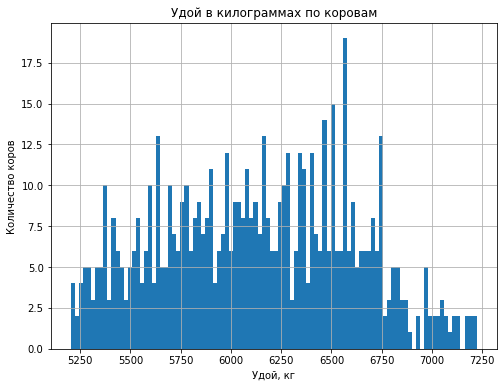

In [58]:
# гистограмма удоев
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
 
ax.hist(df_main['удой,кг'], 100)
ax.grid()

plt.title('Удой в килограммах по коровам')
plt.xlabel('Удой, кг')
plt.ylabel('Количество коров')
plt.show()

Распределение удоев близко к нормальному. 

####   Анализ данных по эке

In [59]:
df_main['эке'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64

In [60]:
span_diagramm(df_main, 'эке', 'Диаграмма размаха по эке')

Аномальных выбросов по ЭКЕ не наблюдается.

Нижней границей допустимых значений для энергетической кормовой единицы (ЭКЕ) можно считать `10,9`. От `13,5` до `15,6` расположена масса основных значений. Верхняя граница допустимых значений `16,8` кг. Медианное значение ЭКЕ `14,7`. 

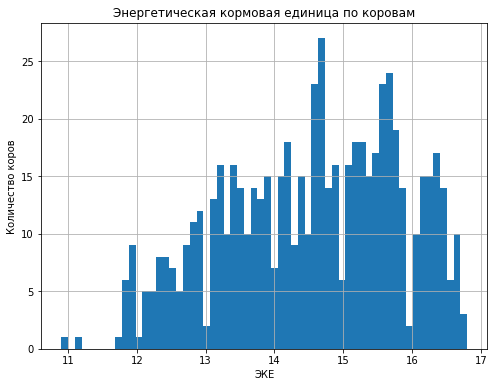

In [61]:
# гистограмма эке
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
 
ax.hist(df_main['эке'], 60)
ax.grid()

plt.title('Энергетическая кормовая единица по коровам')
plt.xlabel('ЭКЕ')
plt.ylabel('Количество коров')
plt.show()

Распределение ЭКЕ близкое к нормальному.

####   Анализ данных по сырому протеину, г

In [62]:
df_main['сырой_протеин,г'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой_протеин,г, dtype: float64

In [63]:
span_diagramm(df_main, 'сырой_протеин,г', 'Диаграмма размаха по сырому протеину')

Аномальных выбросов по сырому протеину не наблюдается.

Нижней границей допустимых значений для сырого протеина в корме можно считать `1660` грамм (гр.). От `1771` до `2062` расположена масса основных значений. Верхняя граница допустимых значений `2349` гр. Медианное значение сырого протеина `1888`. 

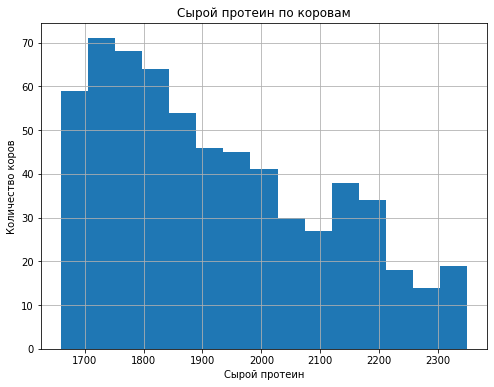

In [64]:
# гистограмма сырого протеина
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
 
ax.hist(df_main['сырой_протеин,г'], 15)
ax.grid()

plt.title('Сырой протеин по коровам')
plt.xlabel('Сырой протеин')
plt.ylabel('Количество коров')
plt.show()

Распределение нисходящее, похожее на распределение Пуассона.

####   Анализ данных по спо

In [65]:
df_main['спо'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64

In [66]:
span_diagramm(df_main, 'спо', 'Диаграмма размаха по сахаро-протеиновому соотношению')

Аномальных выбросов по СПО не наблюдается.

Нижней границей допустимых значений для отношения сахара к протеину в корме коровы (СПО) можно считать `0,84`. От `0,89` до `0,94` расположена масса основных значений. Верхняя граница допустимых значений `0,96`. Медианное значение СПО `0,93`. 

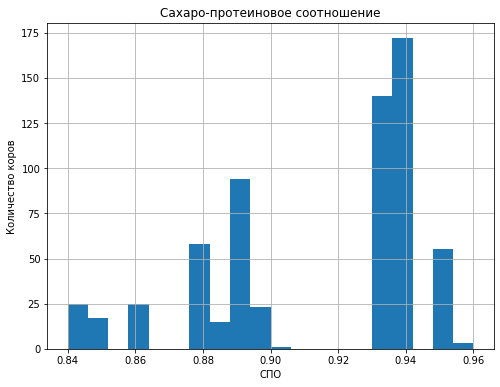

In [67]:
# гистограмма СПО
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
 
ax.hist(df_main['спо'], 20)
ax.grid()

plt.title('Сахаро-протеиновое соотношение')
plt.xlabel('СПО')
plt.ylabel('Количество коров')
plt.show()

####   Анализ данных по жирности

In [68]:
df_main['жирность,%'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность,%, dtype: float64

In [69]:
span_diagramm(df_main, 'жирность,%', 'Диаграмма размаха по жирности')

Наблюдаются выбросы при значении жирности меньше 3,4 %.

Нижней границей допустимых значений для содержания жиров в молоке в % можно считать 3,4. От 3,59 до 3,72 расположена масса основных значений. Верхняя граница допустимых значений 3,75. Медианное значение жирности 3,65 %. 

Все показатели жирности, которые находятся до 3,4 % можно считать разовыми.

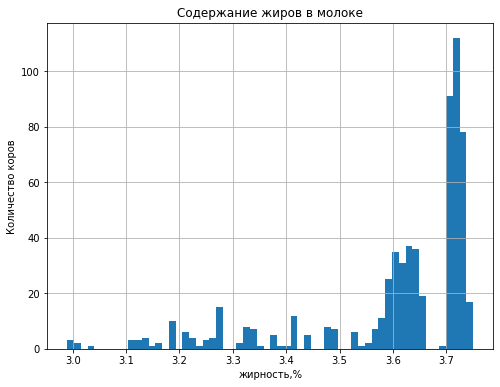

In [70]:
# гистограмма по жирности
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
 
ax.hist(df_main['жирность,%'], 60)
ax.grid()

plt.title('Содержание жиров в молоке')
plt.xlabel('жирность,%')
plt.ylabel('Количество коров')
plt.show()

####   Анализ данных по белку

In [71]:
df_main['белок,%'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок,%, dtype: float64

In [72]:
span_diagramm(df_main, 'белок,%', 'Диаграмма размаха по содержанию белков в молоке')

Явных отклонений не наблюдается, хотя незначительные выбросы имеются.

Нижней границей допустимых значений для содержания белков в молоке в % можно считать 3,07. От 3,074 до 3,077 расположена масса основных значений. Верхняя граница допустимых значений 3,081. Медианное значение содержания белков 3,076 %. 

Все показатели жирности, которые находятся до 3,07 и после 3,081 % можно считать разовыми.

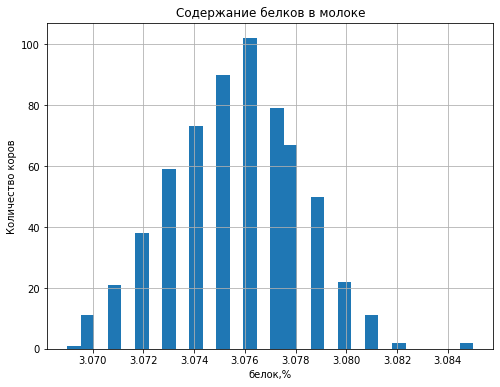

In [73]:
# гистограмма по белку
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
 
ax.hist(df_main['белок,%'], 30)
ax.grid()

plt.title('Содержание белков в молоке')
plt.xlabel('белок,%')
plt.ylabel('Количество коров')
plt.show()

Распределение близкое к нормальному

####   Анализ данных по породам

In [74]:
# частота встречаемости пород коров
df_main.groupby('порода')['id'].count()

порода
Вис Бик Айдиал     372
РефлешнСоверинг    256
Name: id, dtype: int64

In [75]:
fig = px.pie((df_main
             .groupby('порода')['id']
             .count()
             .reset_index()
             .rename(columns={
                 'порода': 'Порода', 
                 'id': 'Коров'}))
             .sort_values(by='Коров', ascending=False),
             
             values='Коров', 
             names='Порода', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей коров по породам', 
             height=500)

fig.update_traces(textposition='inside', textinfo='percent', hovertemplate='')
fig.update_layout(showlegend=True, legend_title='Порода',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})

fig.show()

Распределение долей коров по породам: Вис Бик Айдиал - 59,2 %; РефлешнСоверинг - 40,8 %.

####   Анализ данных по типу пастбищ

In [76]:
# частота встречаемости типа пастбищ
df_main.groupby('тип_пастбища')['id'].count()

тип_пастбища
Равнинное    278
Холмистое    350
Name: id, dtype: int64

In [77]:
fig = px.pie((df_main
             .groupby('тип_пастбища')['id']
             .count()
             .reset_index()
             .rename(columns={
                 'тип_пастбища': 'Пастбище', 
                 'id': 'Коров'}))
             .sort_values(by='Коров', ascending=False),
             
             values='Коров', 
             names='Пастбище', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей коров по типу пастбищ', 
             height=500)

fig.update_traces(textposition='inside', textinfo='percent', hovertemplate='')
fig.update_layout(showlegend=True, legend_title='Пастбище',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})

fig.show()

Распределение долей коров по типу пастбищ: Холмистое - 55,7 %; Равнинное - 44,3 %.

####   Анализ данных по породе папы коровы

In [78]:
# частота встречаемости породы папы коровы
df_main.groupby('порода_папы_быка')['id'].count()

порода_папы_быка
Айдиал     317
Соверин    311
Name: id, dtype: int64

In [79]:
fig = px.pie((df_main
             .groupby('порода_папы_быка')['id']
             .count()
             .reset_index()
             .rename(columns={
                 'порода_папы_быка': 'Порода папы быка', 
                 'id': 'Коров'}))
             .sort_values(by='Коров', ascending=False),
             
             values='Коров', 
             names='Порода папы быка', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей коров по породе папы быка', 
             height=500)

fig.update_traces(textposition='inside', textinfo='percent', hovertemplate='')
fig.update_layout(showlegend=True, legend_title='Порода папы быка',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})

fig.show()

Распределение долей коров по породе папы быка: Айдиал - 50,5 %; Соверин - 49,5 %.

####   Анализ данных по вкусу молока

In [80]:
# частота встречаемости вкуса молока
df_main.groupby('вкус_молока')['id'].count()

вкус_молока
вкусно       370
не вкусно    258
Name: id, dtype: int64

In [81]:
fig = px.pie((df_main
             .groupby('вкус_молока')['id']
             .count()
             .reset_index()
             .rename(columns={
                 'вкус_молока': 'Вкус молока', 
                 'id': 'Коров'}))
             .sort_values(by='Коров', ascending=False),
             
             values='Коров', 
             names='Вкус молока', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей коров по вкусу молока', 
             height=500)

fig.update_traces(textposition='inside', textinfo='percent', hovertemplate='')
fig.update_layout(showlegend=True, legend_title='Вкус молока',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})

fig.show()

Распределение долей коров по вкусу молока: вкусно - 58,9 %; не вкусно - 41,1 %.

####   Анализ данных по возрасту

In [82]:
# частота встречаемости возрасты коровы
df_main.groupby('возраст')['id'].count()

возраст
более_2_лет    518
менее_2_лет    110
Name: id, dtype: int64

In [83]:
fig = px.pie((df_main
             .groupby('возраст')['id']
             .count()
             .reset_index()
             .rename(columns={
                 'возраст': 'Возраст', 
                 'id': 'Коров'}))
             .sort_values(by='Коров', ascending=False),
             
             values='Коров', 
             names='Возраст', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей коров по возрасту', 
             height=500)

fig.update_traces(textposition='inside', textinfo='percent', hovertemplate='')
fig.update_layout(showlegend=True, legend_title='Возраст',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})

fig.show()

Распределение долей коров по возрасту: более 2 лет - 82,5 %; менее 2 лет - 17,5 %.

###  Анализ данных в "df_dad"

In [84]:
# частота встречаемости имен папы коровы
df_dad.groupby('имя_папы')['id'].count()

имя_папы
Барин       240
Буйный      215
Геркулес     64
Соловчик    110
Name: id, dtype: int64

In [85]:
fig = px.pie((df_dad
             .groupby('имя_папы')['id']
             .count()
             .reset_index()
             .rename(columns={
                 'имя_папы': 'Имя папы', 
                 'id': 'Коров'}))
             .sort_values(by='Коров', ascending=False),
             
             values='Коров', 
             names='Имя папы', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей коров по имени папы', 
             height=500)

fig.update_traces(textposition='inside', textinfo='percent', hovertemplate='')
fig.update_layout(showlegend=True, legend_title='Имя папы',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})

fig.show()

Распределение долей коров по имени папы: Барин - 38,2 %; Буйный - 34,2 %; Соловчик - 17,5 %; Геркулес - 10,2 %.

###  Анализ данных в "df_cow_buy"

####   Анализ данных по текущей жирности

In [86]:
df_cow_buy['текущая_жирность,%'].describe()

count    16.000000
mean      3.571875
std       0.141620
min       3.340000
25%       3.415000
50%       3.585000
75%       3.692500
max       3.770000
Name: текущая_жирность,%, dtype: float64

In [87]:
span_diagramm(df_cow_buy, 'текущая_жирность,%', 'Диаграмма размаха по содержанию жиров в молоке')

Явных отклонений не наблюдается.

Нижней границей допустимых значений для содержания жиров в молоке в % можно считать 3,34. От 3,41 до 3,705 расположена масса основных значений. Верхняя граница допустимых значений 3,77. Медианное значение жирности 3,585 %. 

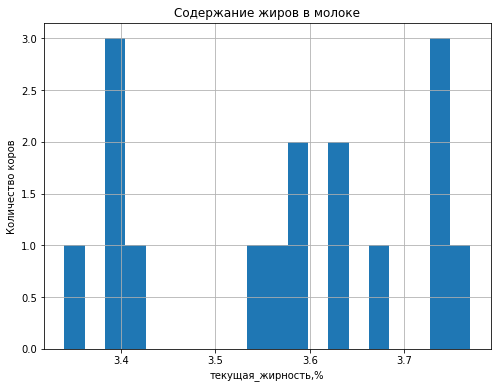

In [88]:
# гистограмма по текущей жирности
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
 
ax.hist(df_cow_buy['текущая_жирность,%'], 20)
ax.grid()

plt.title('Содержание жиров в молоке')
plt.xlabel('текущая_жирность,%')
plt.ylabel('Количество коров')
plt.show()

####   Анализ данных по текущему уровню белка

In [89]:
df_cow_buy['текущий_уровень_белка,%'].describe()

count    16.000000
mean      3.068250
std       0.011264
min       3.046000
25%       3.059500
50%       3.073500
75%       3.076750
max       3.081000
Name: текущий_уровень_белка,%, dtype: float64

In [90]:
span_diagramm(df_cow_buy, 'текущий_уровень_белка,%', 'Диаграмма размаха по содержанию белков в молоке')

Явных отклонений не наблюдается.

Нижней границей допустимых значений для содержания белков в молоке в % можно считать 3,046. От 3,058 до 3,0775 расположена масса основных значений. Верхняя граница допустимых значений 3,081. Медианное значение содержания белков 3,0735 %. 

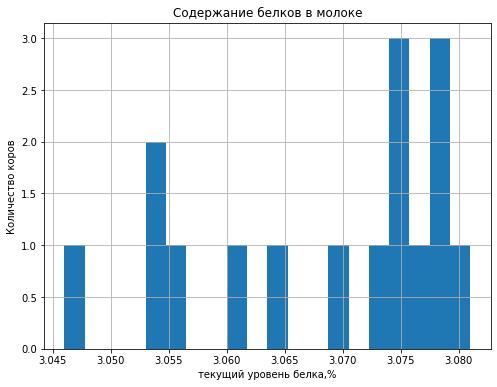

In [91]:
# гистограмма по текущему уровню белка
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
 
ax.hist(df_cow_buy['текущий_уровень_белка,%'], 20)
ax.grid()

plt.title('Содержание белков в молоке')
plt.xlabel('текущий уровень белка,%')
plt.ylabel('Количество коров')
plt.show()

####   Анализ данных по породам коров

In [92]:
# частота встречаемости пород коров
df_cow_buy.groupby('порода')['возраст'].count()

порода
Вис Бик Айдиал     8
РефлешнСоверинг    8
Name: возраст, dtype: int64

In [93]:
fig = px.pie((df_cow_buy
             .groupby('порода')['возраст']
             .count()
             .reset_index()
             .rename(columns={
                 'порода': 'Порода', 
                 'возраст': 'Коров'}))
             .sort_values(by='Коров', ascending=False),
             
             values='Коров', 
             names='Порода', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей коров по породе', 
             height=500)

fig.update_traces(textposition='inside', textinfo='percent', hovertemplate='')
fig.update_layout(showlegend=True, legend_title='Порода',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})

fig.show()

Распределение долей коров по породе: Вис Бик Айдиал - 50 %; РефлешнСоверинг - 50 %.

####   Анализ данных по типу пастбища

In [94]:
# частота встречаемости типов пастбища
df_cow_buy.groupby('тип_пастбища')['возраст'].count()

тип_пастбища
Равнинное    8
Холмистое    8
Name: возраст, dtype: int64

In [95]:
fig = px.pie((df_cow_buy
             .groupby('тип_пастбища')['возраст']
             .count()
             .reset_index()
             .rename(columns={
                 'тип_пастбища': 'Тип пастбища', 
                 'возраст': 'Коров'}))
             .sort_values(by='Коров', ascending=False),
             
             values='Коров', 
             names='Тип пастбища', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей коров по типу пастбища', 
             height=500)

fig.update_traces(textposition='inside', textinfo='percent', hovertemplate='')
fig.update_layout(showlegend=True, legend_title='Тип пастбища',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})

fig.show()

Распределение долей коров по типу пастбища: Равнинное - 50 %; Холмистое - 50 %.

####   Анализ данных по породе папы быка

In [96]:
# частота встречаемости пород папы быка
df_cow_buy.groupby('порода_папы_быка')['возраст'].count()

порода_папы_быка
Айдиал      6
Соверин    10
Name: возраст, dtype: int64

In [97]:
fig = px.pie((df_cow_buy
             .groupby('порода_папы_быка')['возраст']
             .count()
             .reset_index()
             .rename(columns={
                 'порода_папы_быка': 'Порода папы быка', 
                 'возраст': 'Коров'}))
             .sort_values(by='Коров', ascending=False),
             
             values='Коров', 
             names='Порода папы быка', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей коров по породе папы быка', 
             height=500)

fig.update_traces(textposition='inside', textinfo='percent', hovertemplate='')
fig.update_layout(showlegend=True, legend_title='Порода папы быка',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})

fig.show()

Распределение долей коров по породе папы быка: Соверин - 62,5 %; Айдиал - 37,5 %.

####   Анализ данных по имени папы коровы

In [98]:
# частота встречаемости пород по имени папы
df_cow_buy.groupby('имя_папы')['возраст'].count()

имя_папы
Барин       2
Буйный      7
Геркулес    5
Соловчик    2
Name: возраст, dtype: int64

In [99]:
fig = px.pie((df_cow_buy
             .groupby('имя_папы')['возраст']
             .count()
             .reset_index()
             .rename(columns={
                 'имя_папы': 'Имя папы', 
                 'возраст': 'Коров'}))
             .sort_values(by='Коров', ascending=False),
             
             values='Коров', 
             names='Имя папы', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей коров по имени папы', 
             height=500)

fig.update_traces(textposition='inside', textinfo='percent', hovertemplate='')
fig.update_layout(showlegend=True, legend_title='Имя папы',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})

fig.show()

Распределение долей коров по имени папы: Буйный - 43,8 %; Геркулес - 31,3 %; Барин - 12,5 %; Соловчик - 12,5 %.

####   Анализ данных по возрасту коров

In [100]:
# частота встречаемости возраста коров
df_cow_buy.groupby('возраст')['порода'].count()

возраст
более_2_лет    11
менее_2_лет     5
Name: порода, dtype: int64

In [101]:
fig = px.pie((df_cow_buy
             .groupby('возраст')['порода']
             .count()
             .reset_index()
             .rename(columns={
                 'возраст': 'Возраст', 
                 'порода': 'Коров'}))
             .sort_values(by='Коров', ascending=False),
             
             values='Коров', 
             names='Возраст', 
             color_discrete_sequence=[colors[0], colors[7]],
             title='Распределение долей коров по возрасту', 
             height=500)

fig.update_traces(textposition='inside', textinfo='percent', hovertemplate='')
fig.update_layout(showlegend=True, legend_title='Возраст',
                  plot_bgcolor='AliceBlue',
                  margin={"r": 0, "t": 50, "l": 0, "b": 50})

fig.show()

Распределение долей коров по возрасту: более 2 лет - 68,8 %; менее 2 лет - 31,3 %.

**Вывод:** 
- Почти все признаки распределены нормально;
- Убрали аномальное значение признака Удой, кг = 45616;
- Распределение категориальных переменных в норме.

## Корреляционный анализ

### Корреляционный анализ по "df_main"

#### Взаимосвязь между признаками по "df_main"

interval columns not set, guessing: ['удой,кг', 'эке', 'сырой_протеин,г', 'спо', 'жирность,%', 'белок,%']


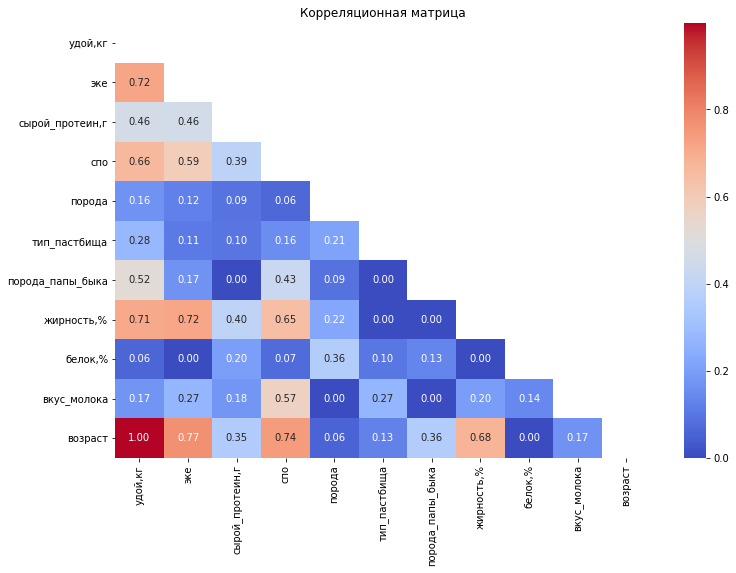

In [102]:
# построение тепловой карты
#sns.heatmap(df_main.corr(), annot=True, fmt='.2f');

# Корреляционный анализ
phik_matrix = df_main.drop('id', axis=1).phik_matrix()

# Визуализация корреляционной матрицы 
mask = np.triu(np.ones_like(phik_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Корреляционная матрица")
plt.show()

#### Диаграммы рассеяния для удоя по остальным признакам "df_main"

##### Взаимосвязь удоя от ЭКЕ с учетом категориальных признаков "df_main"

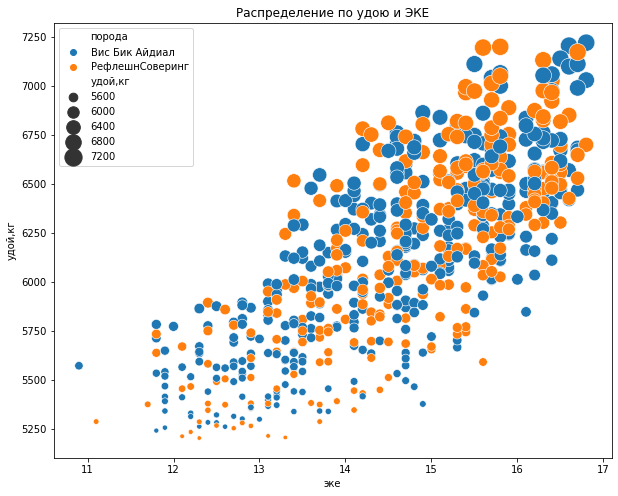

In [103]:
# взаимосвязь удоя от ЭКЕ с привязкой к породе
distribution(df_main, 'эке', 'удой,кг', 'порода', 'Распределение по удою и ЭКЕ')

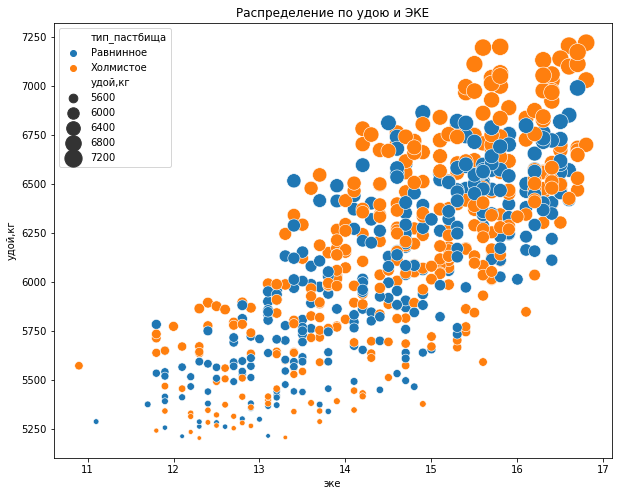

In [104]:
# взаимосвязь удоя от ЭКЕ с привязкой к типу пастбища
distribution(df_main, 'эке', 'удой,кг', 'тип_пастбища', 'Распределение по удою и ЭКЕ')

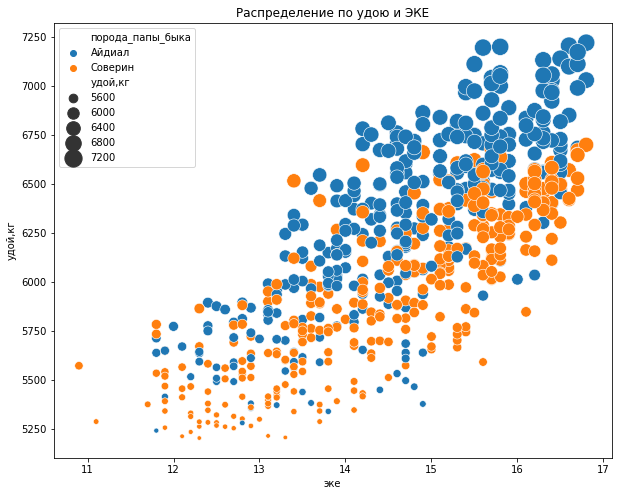

In [105]:
# взаимосвязь удоя от ЭКЕ с привязкой к породе папы быка
distribution(df_main, 'эке', 'удой,кг', 'порода_папы_быка', 'Распределение по удою и ЭКЕ')

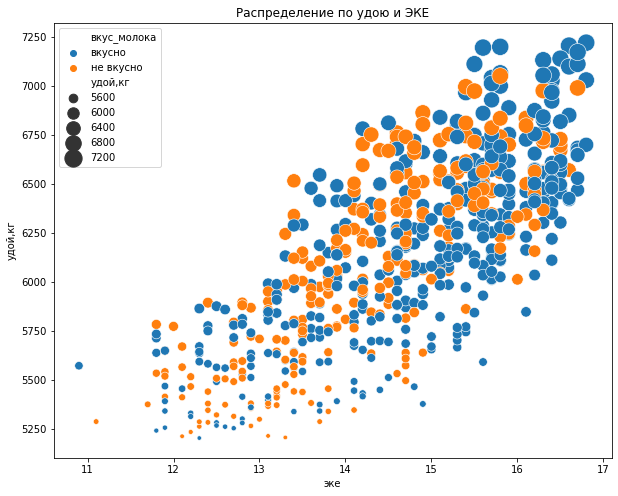

In [106]:
# взаимосвязь удоя от ЭКЕ с привязкой к вкусу молока
distribution(df_main, 'эке', 'удой,кг', 'вкус_молока', 'Распределение по удою и ЭКЕ')

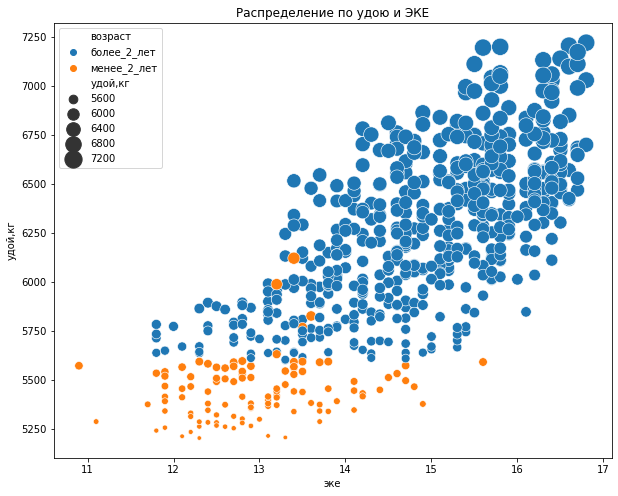

In [107]:
# взаимосвязь удоя от ЭКЕ с привязкой к возрасту
distribution(df_main, 'эке', 'удой,кг', 'возраст', 'Распределение по удою и ЭКЕ')

##### Взаимосвязь удоя от сырого протеина с учетом категориальных признаков "df_main"

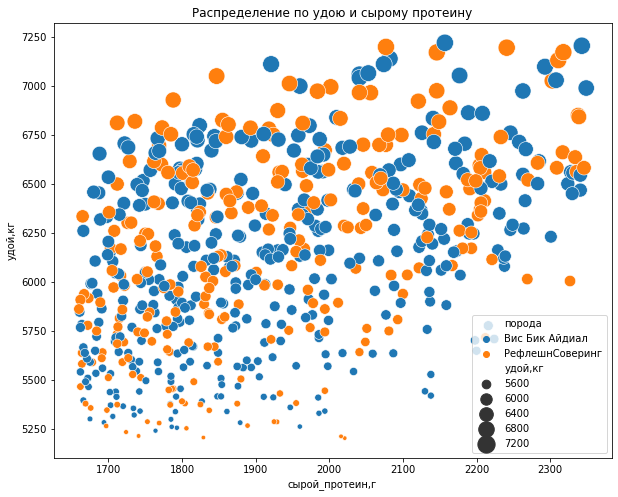

In [108]:
# взаимосвязь удоя от сырого протеина с привязкой к породе
distribution(df_main, 'сырой_протеин,г', 'удой,кг', 'порода', 'Распределение по удою и сырому протеину')

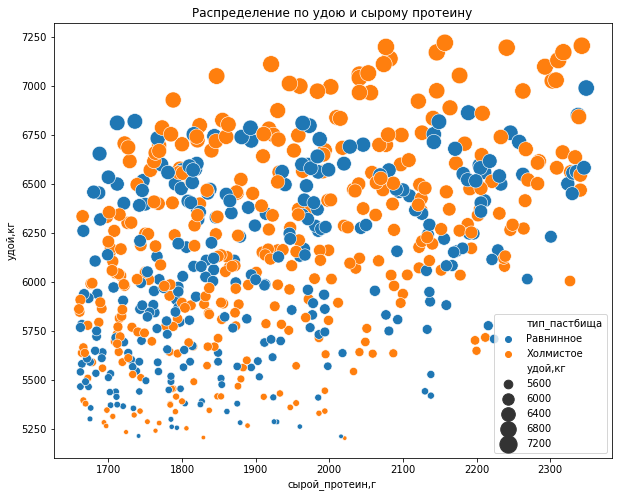

In [109]:
# взаимосвязь удоя от сырого протеина с привязкой к типу пастбища
distribution(df_main, 'сырой_протеин,г', 'удой,кг', 'тип_пастбища', 'Распределение по удою и сырому протеину')

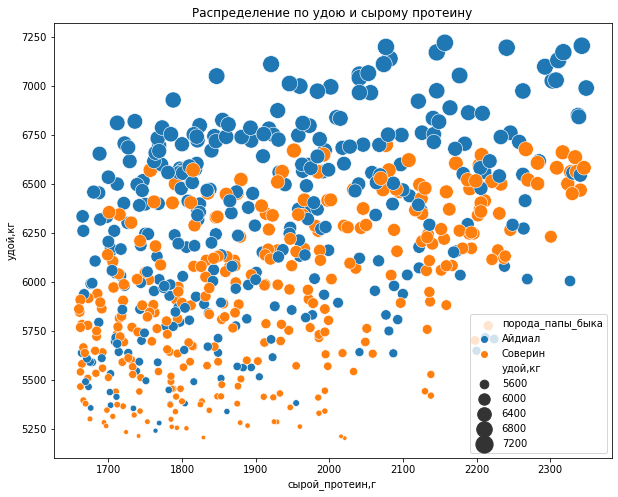

In [110]:
# взаимосвязь удоя от сырого протеина с привязкой к породе папы быка
distribution(df_main, 'сырой_протеин,г', 'удой,кг', 'порода_папы_быка', 'Распределение по удою и сырому протеину')

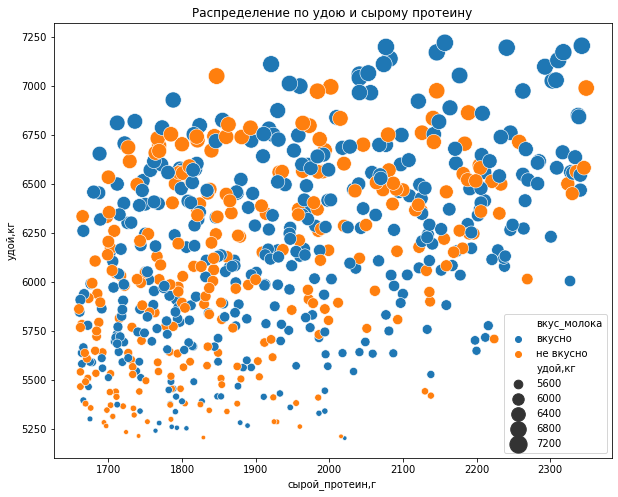

In [111]:
# взаимосвязь удоя от сырого протеина с привязкой к вкусу молока
distribution(df_main, 'сырой_протеин,г', 'удой,кг', 'вкус_молока', 'Распределение по удою и сырому протеину')

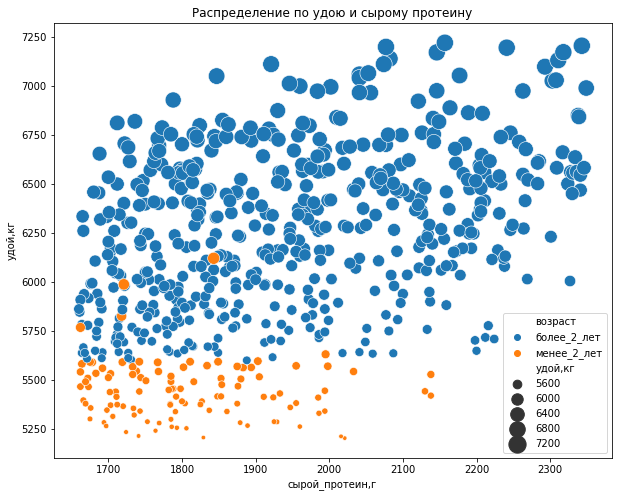

In [112]:
# взаимосвязь удоя от сырого протеина с привязкой к возрасту
distribution(df_main, 'сырой_протеин,г', 'удой,кг', 'возраст', 'Распределение по удою и сырому протеину')

##### Взаимосвязь удоя от СПО с учетом категориальных признаков "df_main"

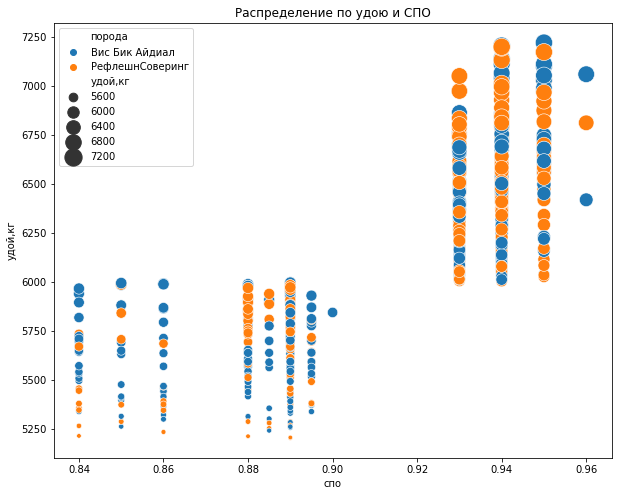

In [113]:
# взаимосвязь удоя от СПО с привязкой к породе
distribution(df_main, 'спо', 'удой,кг', 'порода', 'Распределение по удою и СПО')

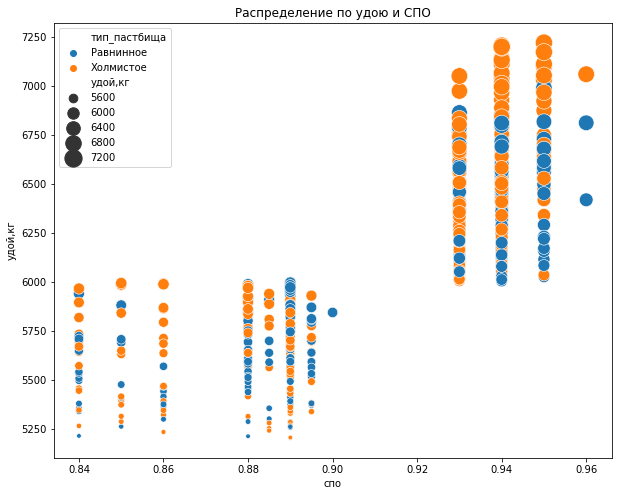

In [114]:
# взаимосвязь удоя от СПО с привязкой к типу пастбища
distribution(df_main, 'спо', 'удой,кг', 'тип_пастбища', 'Распределение по удою и СПО')

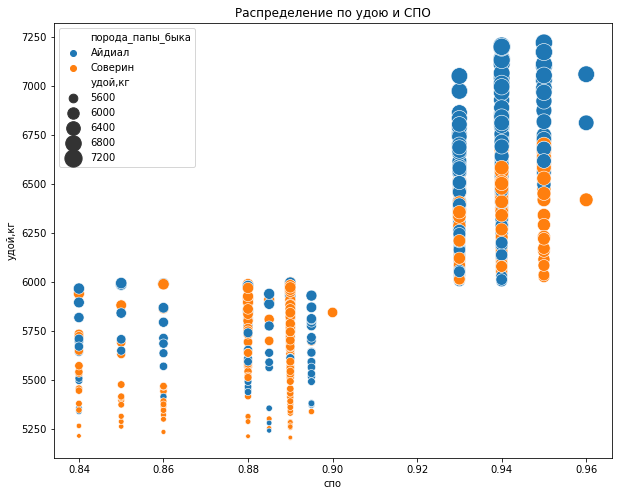

In [115]:
# взаимосвязь удоя от СПО с привязкой к породе папы быка
distribution(df_main, 'спо', 'удой,кг', 'порода_папы_быка', 'Распределение по удою и СПО')

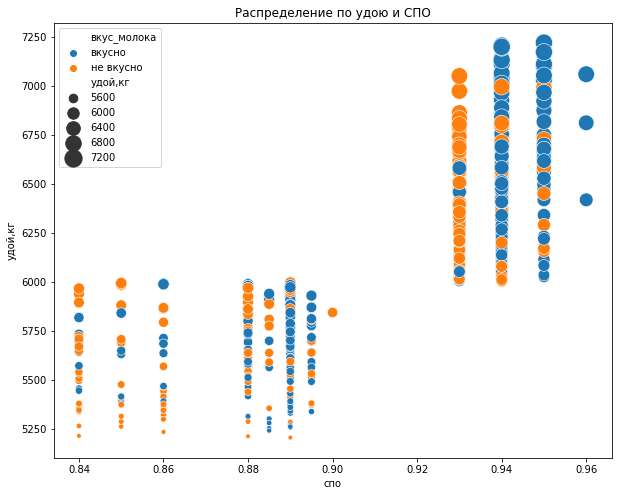

In [116]:
# взаимосвязь удоя от СПО с привязкой к вкусу молока
distribution(df_main, 'спо', 'удой,кг', 'вкус_молока', 'Распределение по удою и СПО')

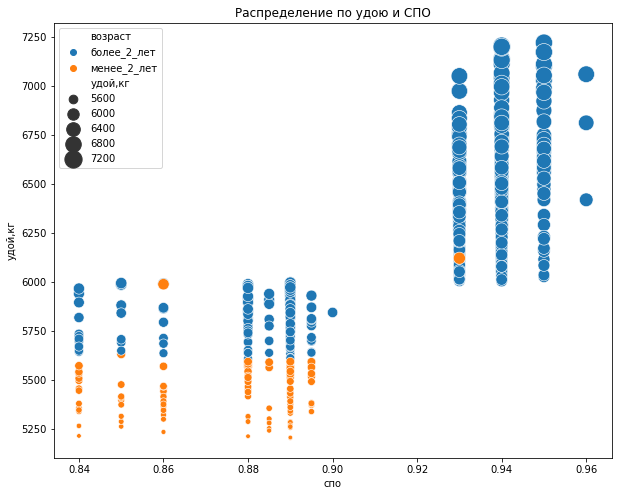

In [117]:
# взаимосвязь удоя от СПО с привязкой к возрасту
distribution(df_main, 'спо', 'удой,кг', 'возраст', 'Распределение по удою и СПО')

##### Взаимосвязь удоя от жирности с учетом категориальных признаков "df_main"

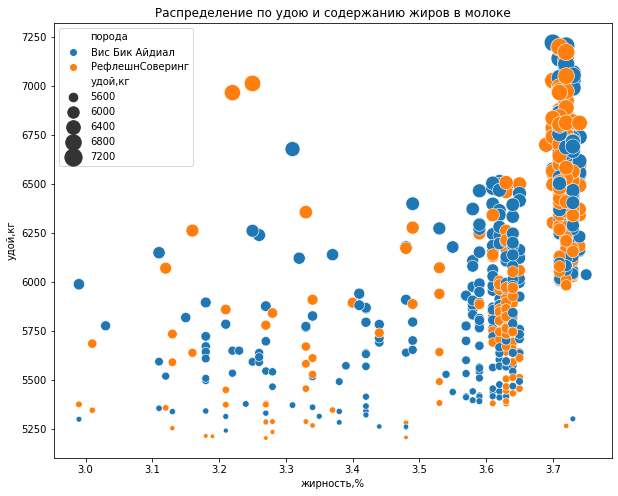

In [118]:
# взаимосвязь удоя от жирности с привязкой к породе
distribution(df_main, 'жирность,%', 'удой,кг', 'порода', 'Распределение по удою и содержанию жиров в молоке')

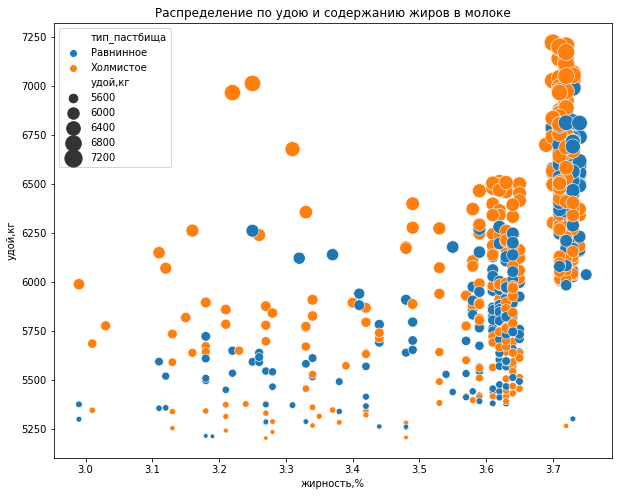

In [119]:
# взаимосвязь удоя от жирности с привязкой к типу пастбища
distribution(df_main, 'жирность,%', 'удой,кг', 'тип_пастбища', 'Распределение по удою и содержанию жиров в молоке')

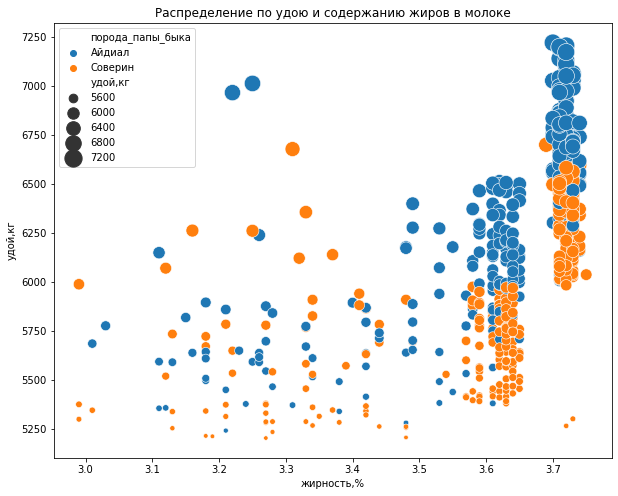

In [120]:
# взаимосвязь удоя от жирности с привязкой к породе папы быка
distribution(df_main, 'жирность,%', 'удой,кг', 'порода_папы_быка', 'Распределение по удою и содержанию жиров в молоке')

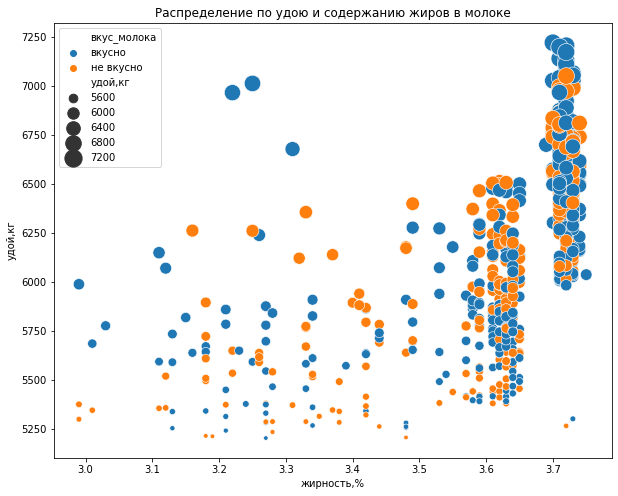

In [121]:
# взаимосвязь удоя от жирности с привязкой к вкусу молока
distribution(df_main, 'жирность,%', 'удой,кг', 'вкус_молока', 'Распределение по удою и содержанию жиров в молоке')

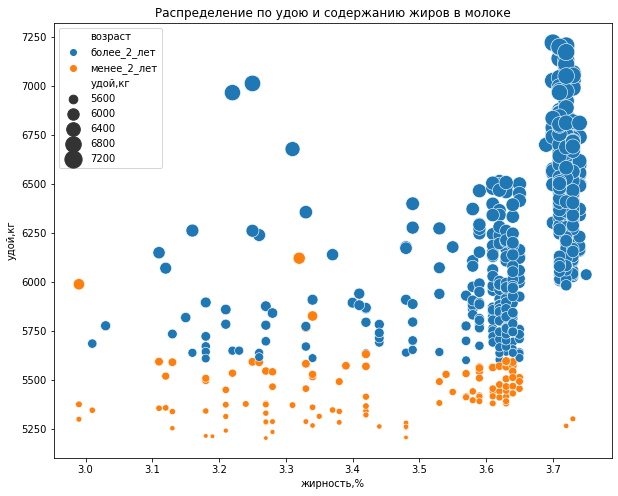

In [122]:
# взаимосвязь удоя от жирности с привязкой к возрасту
distribution(df_main, 'жирность,%', 'удой,кг', 'возраст', 'Распределение по удою и содержанию жиров в молоке')

##### Взаимосвязь удоя от белков с учетом категориальных признаков "df_main"

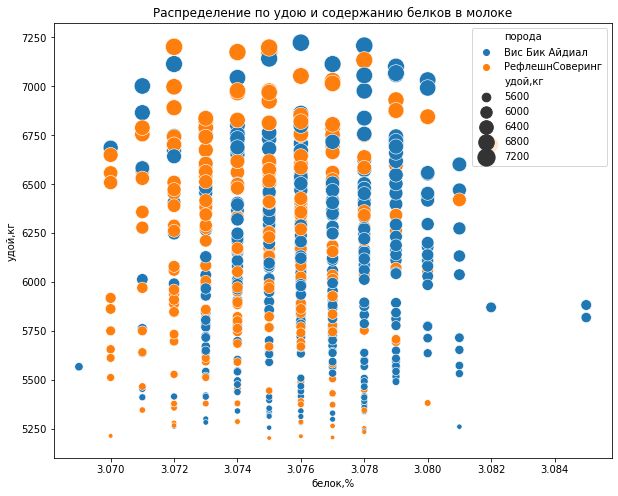

In [123]:
# взаимосвязь удоя от белков с привязкой к породе
distribution(df_main, 'белок,%', 'удой,кг', 'порода', 'Распределение по удою и содержанию белков в молоке')

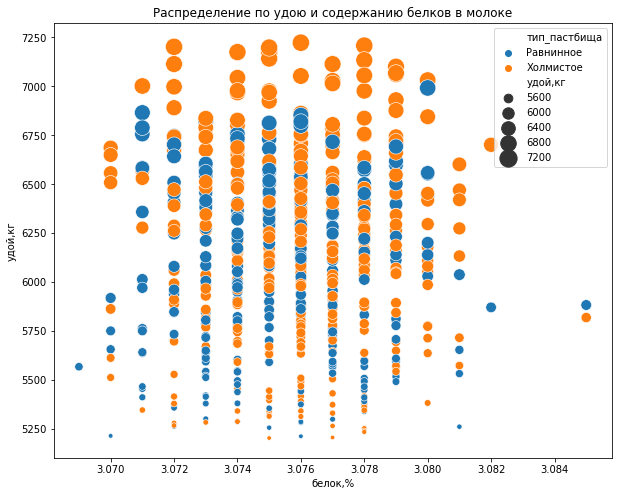

In [124]:
# взаимосвязь удоя от белков с привязкой к типу пастбища
distribution(df_main, 'белок,%', 'удой,кг', 'тип_пастбища', 'Распределение по удою и содержанию белков в молоке')

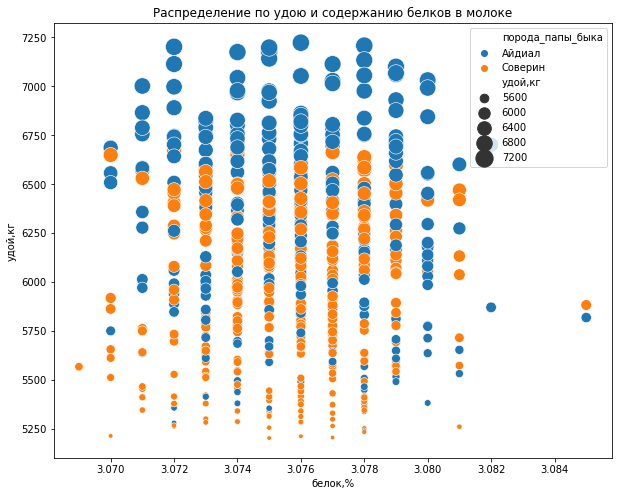

In [125]:
# взаимосвязь удоя от белков с привязкой к породе папы быка
distribution(df_main, 'белок,%', 'удой,кг', 'порода_папы_быка', 'Распределение по удою и содержанию белков в молоке')

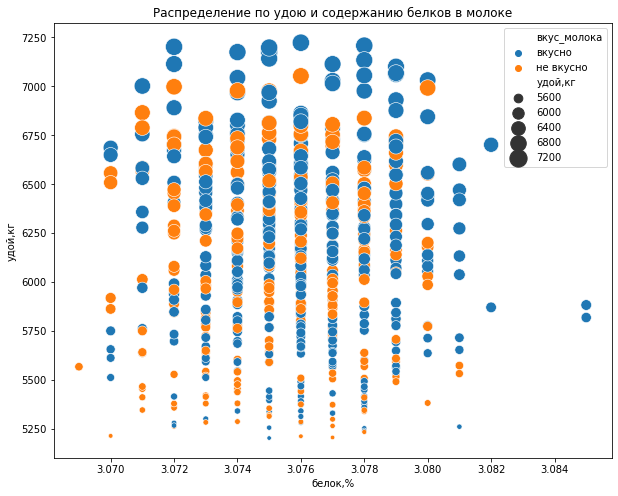

In [126]:
# взаимосвязь удоя от белков с привязкой к вкусу молока
distribution(df_main, 'белок,%', 'удой,кг', 'вкус_молока', 'Распределение по удою и содержанию белков в молоке')

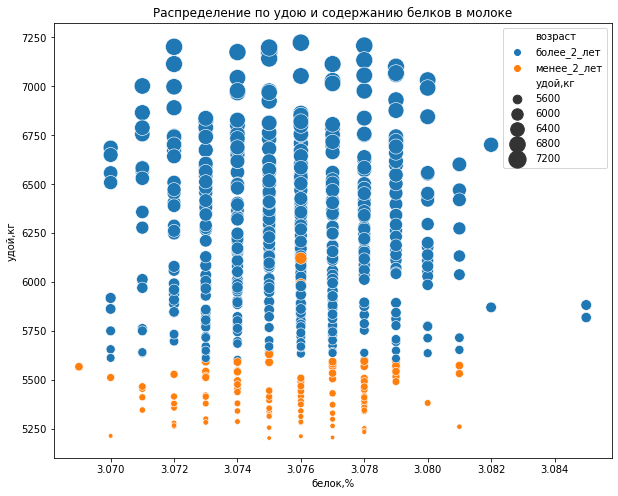

In [127]:
# взаимосвязь удоя от белков с привязкой к возрасту
distribution(df_main, 'белок,%', 'удой,кг', 'возраст', 'Распределение по удою и содержанию белков в молоке')

### Выводы о взаимосвязи признаков

Корреляция между **Удоем** и другими признаками:
- **ЭКЕ**: положительная высокая взаимосвязь. С увеличением ЭКЕ увеличивается и удой. По графикам распределения, корреляция справедлива как для одной, так и для другой породы. Коэффициент взаимосвязи: 0.72;
- **Сырой_протеин**: на диаграмме рассеяния наблюдается общий тренд на прямую пропорциональную зависимость. Связь умеренно положительная. Коэффициент взаимосвязи: 0.46;
- **СПО**: Похоже, что Удой заметно зависит от СПО - высокий коэффициент корреляции. Связь похожа на нелинейную. На диаграмме рассеяния наблюдается группировка в два кластера между границей СПО = 0.91 Коэффициент взаимосвязи: 0.66;
- **Порода**: Удой слабо зависит от породы. Коэффициент взаимосвязи: 0.16;
- **Тип пастбища**: Удой слабо зависит от типа пастбища. Коэффициент взаимосвязи: 0.28;
- **Порода папы быка**: Удой заметно зависит от породы папы быка - высокий коэффициент корреляции. Коэффициент взаимосвязи: 0.52;
- **Жирность**: Заметная положительная зависимость. Более всего связь раскрывается на переходе значений жирность == 3.6 и 3.7. Коэффициент взаимосвязи: 0.71;
- **Белок**: Связь слабая. Связь между этим признаком и целевым - нелинейная. Но стоит отметить, что наблюдается зависимость между признаком белок и породой. Меньшее значения белка характерно для породы РефлешнСоверинг, большее значение - для породы Вис Бик Айдиал. Коэффициент взаимосвязи: 0.06;
- **Вкус молока**: Вкус молока слабо зависит от удоя. Коэффициент взаимосвязи: 0.17;
- **Возраст**: Возраст имеет сильнейшую взаимосвязь с Удоем. Коэффициент взаимосвязи: 1.00

Между целевым и входными признаками связь в основном линейная, но наличие нелинейных связей также прослеживается.

Для того чтобы подтвердить линейность между целевым и входными признаками, нужно на диаграмме рассеяния увидеть как точки выстраиваются примерно в одну линию. 


Что касается мультиколлинеарности: корреляционная матрица показала, что между некоторыми входными признаками есть умеренная корреляция, но нет явных признаков сильной мультиколлинеарности, с которой стоило бы справляться.

- **ЭКЕ** - линейная зависимость неярковыраженная;
- **Сырой_протеин** - линейная зависимость еще менее выраженей, чем у "Эке";
- **СПО** - линейная зависимость отсутствует;
- **Жирность** - линейной зависимости нет;
- **Белок** - зависимости не наблюдается, учитывая коэффициент корреляции.

## Обучение модели линейной регрессии

### Первая модель

#### Отбор признаков для модели линейной регресии

В качестве целевого признака возьмем **Удой, кг**. 

Из всех признаков явно можно избавиться от признака белок. С ним связь целевого признака, фактически, отсутствует.
Жирность также убираем, поскольку признак является характеристикой молока и напрямую не связан с удоем.
Признак id для обучения моделей тоже не нужен.

In [128]:
# копия датасета
df_main_model_1 = df_main.copy()

# удаление неважных столбцов с точки зрения построения модели
df_main_model_1 = df_main_model_1.drop(['id', 'белок,%', 'жирность,%'], axis=1)
df_main_model_1.head()

удой,кг   эке  сырой_протеин,г    спо           порода тип_пастбища  \
0     5863  14.2             1743  0.890   Вис Бик Айдиал    Равнинное   
1     5529  12.8             2138  0.890   Вис Бик Айдиал    Равнинное   
2     5810  14.0             1854  0.885  РефлешнСоверинг    Холмистое   
3     5895  12.4             2012  0.885  РефлешнСоверинг    Холмистое   
4     5302  12.8             1675  0.885   Вис Бик Айдиал    Равнинное   

  порода_папы_быка вкус_молока      возраст  
0           Айдиал      вкусно  более_2_лет  
1          Соверин      вкусно  менее_2_лет  
2          Соверин   не вкусно  более_2_лет  
3           Айдиал   не вкусно  более_2_лет  
4          Соверин      вкусно  менее_2_лет

#### Тренировочная и тестовая выборки

In [129]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

In [130]:
# сохранение признаков
X = df_main_model_1.drop('удой,кг', axis=1)
y = df_main_model_1['удой,кг'] 

In [131]:
# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

#### Кодировка категориальных признаков, масштабирование количественных признаков

In [132]:
# разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
num_col_names = ['эке', 'спо', 'сырой_протеин,г']

# кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



#### Обучение модели линейной регресии

In [133]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

#### Оценка качества модели

In [134]:
# R2 для линейной регрессии
r2 = r2_score(y_test, predictions) 

# MSE для линейной регрессии
mse = mean_squared_error(y_test, predictions)

# RMSE для линейной регрессии
rmse = mean_squared_error(y_test, predictions, squared=False)

# MAE для линейной регрессии
mae = mean_absolute_error(y_test, predictions) 

r2

0.7951757980652822

#### Анализ остатков

In [135]:
# остатки
residuals_1 = y_test - predictions

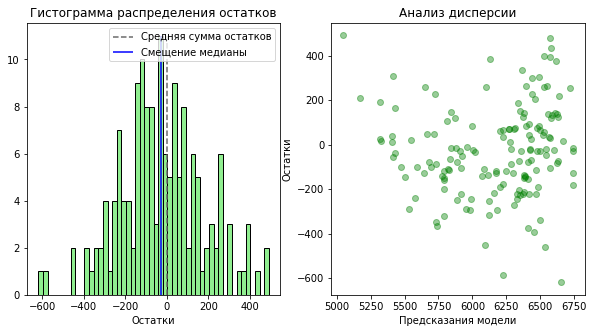

In [136]:
# гистограмма распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(residuals_1, bins=50, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_1.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# график дисперсии
axes[1].scatter(predictions, residuals_1, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

#### Вывод по первой модели

- Гистограмма распределения остатков показывает равномерное распределение. Это говорит о том, что у модели стабильная ошибка на всех предсказаниях. График — симметричен от самого частого значения. Смещение медианы предсказаний минимально;
- В целом, остатки имеют постоянную дисперсию на всём интервале использования модели. Вероятно, модель не очень точно предсказывает значения целевого признака в интервале удой < 6000. На этом участке дисперсия меньше, чем при удое > 6000;
- Для улучшенного моделирования стоит дополнительно получить информацию по коровам, удой которых находится в интервале значений < 6000;
- **R2 первой модели** = 0.7951757980652822

### Вторая модель

#### Отбор признаков для модели линейной регресии

In [137]:
# копия датасета
df_main_model_2 = df_main.copy()
df_main_model_2.head()

id  удой,кг   эке  сырой_протеин,г    спо           порода тип_пастбища  \
0   1     5863  14.2             1743  0.890   Вис Бик Айдиал    Равнинное   
1   2     5529  12.8             2138  0.890   Вис Бик Айдиал    Равнинное   
2   3     5810  14.0             1854  0.885  РефлешнСоверинг    Холмистое   
3   4     5895  12.4             2012  0.885  РефлешнСоверинг    Холмистое   
4   5     5302  12.8             1675  0.885   Вис Бик Айдиал    Равнинное   

  порода_папы_быка  жирность,%  белок,% вкус_молока      возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет

СПО и Удой связаны нелинейно. На диаграмме рассеяния наблюдения сгруппированы в два кластера, причем есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак с порогом = 0,91. 

Эта возможность ценна с точки зрения бизнеса: она позволяет минимизировать ошибки, которые мешают достижению поставленных целей. 

In [138]:
# СПО переводим в категориальный бинарный признак с порогом 0,91
df_main_model_2['спо_категория'] = df_main_model_2['спо'].apply(lambda x: 1 if x>=0.91 else 0)
df_main_model_2['спо_категория'].value_counts()

1    370
0    258
Name: спо_категория, dtype: int64

In [139]:
# ЭКЕ возведем в квадрат
df_main_model_2['эке_квадрат'] = df_main_model_2['эке']**2

In [140]:
# удаление неважных столбцов с точки зрения построения модели
df_main_model_2 = df_main_model_2.drop(['id', 'белок,%', 'жирность,%', 'спо', 'эке'], axis=1)
df_main_model_2.head()

удой,кг  сырой_протеин,г           порода тип_пастбища порода_папы_быка  \
0     5863             1743   Вис Бик Айдиал    Равнинное           Айдиал   
1     5529             2138   Вис Бик Айдиал    Равнинное          Соверин   
2     5810             1854  РефлешнСоверинг    Холмистое          Соверин   
3     5895             2012  РефлешнСоверинг    Холмистое           Айдиал   
4     5302             1675   Вис Бик Айдиал    Равнинное          Соверин   

  вкус_молока      возраст  спо_категория  эке_квадрат  
0      вкусно  более_2_лет              0       201.64  
1      вкусно  менее_2_лет              0       163.84  
2   не вкусно  более_2_лет              0       196.00  
3   не вкусно  более_2_лет              0       153.76  
4      вкусно  менее_2_лет              0       163.84

#### Тренировочная и тестовая выборки

In [141]:
# сохранение признаков
X = df_main_model_2.drop('удой,кг', axis=1)
y = df_main_model_2['удой,кг'] 

In [142]:
# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

#### Кодировка категориальных признаков, масштабирование количественных признаков

In [143]:
# разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
num_col_names = ['эке_квадрат', 'спо_категория', 'сырой_протеин,г']

# кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



#### Обучение модели линейной регресии

In [144]:
model_lr_2  = LinearRegression()
model_lr_2.fit(X_train, y_train)
predictions = model_lr_2.predict(X_test)

#### Оценка качества модели

In [145]:
# R2 для линейной регрессии
r2_2 = r2_score(y_test, predictions) 

# MSE для линейной регрессии
mse_2 = mean_squared_error(y_test, predictions)

# RMSE для линейной регрессии
rmse_2 = mean_squared_error(y_test, predictions, squared=False)

# MAE для линейной регрессии
mae_2 = mean_absolute_error(y_test, predictions) 

r2_2

0.820097367718629

#### Анализ остатков

In [146]:
# остатки
residuals_2 = y_test - predictions

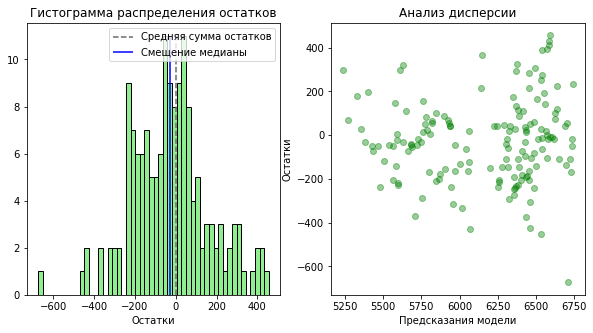

In [147]:
# гистограмма распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(residuals_2, bins=50, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_2.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# график дисперсии
axes[1].scatter(predictions, residuals_2, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

#### Вывод по второй модели

- Гистограмма распределения остатков показывает равномерное распределение. Это говорит о том, что у модели стабильная ошибка на всех предсказаниях. График — симметричен от самого частого значения. Смещение медианы предсказаний минимально;
- В целом, остатки имеют постоянную дисперсию на всём интервале использования модели;
- **R2 второй модели** = 0.820097367718629 Метрика увеличилась, по сравнению с первой моделью. Значит вторая модель работает точнее.

### Третья модель

#### Отбор признаков для модели линейной регресии

In [148]:
# добавим признак Имя папы быка.
df_main_model_3 = df_main.merge(df_dad, on='id')
df_main_model_3.head()

id  удой,кг   эке  сырой_протеин,г    спо           порода тип_пастбища  \
0   1     5863  14.2             1743  0.890   Вис Бик Айдиал    Равнинное   
1   2     5529  12.8             2138  0.890   Вис Бик Айдиал    Равнинное   
2   3     5810  14.0             1854  0.885  РефлешнСоверинг    Холмистое   
3   4     5895  12.4             2012  0.885  РефлешнСоверинг    Холмистое   
4   5     5302  12.8             1675  0.885   Вис Бик Айдиал    Равнинное   

  порода_папы_быка  жирность,%  белок,% вкус_молока      возраст  имя_папы  
0           Айдиал        3.58    3.076      вкусно  более_2_лет    Буйный  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  Соловчик  
2          Соверин        3.59    3.074   не вкусно  более_2_лет     Барин  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет    Буйный  
4          Соверин        3.73    3.073      вкусно  менее_2_лет     Барин

Устраним нелинейность между признаками.

In [149]:
# СПО переводим в категориальный бинарный признак с порогом 0,91
df_main_model_3['спо_категория'] = df_main_model_3['спо'].apply(lambda x: 1 if x>=0.91 else 0)
df_main_model_3['спо_категория'].value_counts()

1    370
0    258
Name: спо_категория, dtype: int64

In [150]:
# ЭКЕ возведем в квадрат
df_main_model_3['эке_квадрат'] = df_main_model_3['эке']**2

In [151]:
# удаление неважных столбцов с точки зрения построения модели
df_main_model_3 = df_main_model_3.drop(['id', 'белок,%', 'жирность,%', 'спо', 'эке'], axis=1)
df_main_model_3.head()

удой,кг  сырой_протеин,г           порода тип_пастбища порода_папы_быка  \
0     5863             1743   Вис Бик Айдиал    Равнинное           Айдиал   
1     5529             2138   Вис Бик Айдиал    Равнинное          Соверин   
2     5810             1854  РефлешнСоверинг    Холмистое          Соверин   
3     5895             2012  РефлешнСоверинг    Холмистое           Айдиал   
4     5302             1675   Вис Бик Айдиал    Равнинное          Соверин   

  вкус_молока      возраст  имя_папы  спо_категория  эке_квадрат  
0      вкусно  более_2_лет    Буйный              0       201.64  
1      вкусно  менее_2_лет  Соловчик              0       163.84  
2   не вкусно  более_2_лет     Барин              0       196.00  
3   не вкусно  более_2_лет    Буйный              0       153.76  
4      вкусно  менее_2_лет     Барин              0       163.84

#### Тренировочная и тестовая выборки

In [152]:
# сохранение признаков
X = df_main_model_3.drop('удой,кг', axis=1)
y = df_main_model_3['удой,кг'] 

In [153]:
# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

In [154]:
# объединим тренировочную и валидационную выборки, чтобы позже заново кодировать и масштабировать полную тренировочную выборку
X_train_full = pd.concat([X_train, X_test], ignore_index=True)
y_train_full = pd.concat([y_train, y_test], ignore_index=True)

#### Кодировка категориальных признаков, масштабирование количественных признаков

In [155]:
# разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'вкус_молока', 'возраст']
num_col_names = ['эке_квадрат', 'спо_категория', 'сырой_протеин,г']

# кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



#### Обучение модели линейной регресии

In [156]:
model_lr_3  = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions = model_lr_3.predict(X_test)

#### Оценка качества модели

In [157]:
# R2 для линейной регрессии
r2_3 = r2_score(y_test, predictions) 

# MSE для линейной регрессии
mse_3 = mean_squared_error(y_test, predictions)

# RMSE для линейной регрессии
rmse_3 = mean_squared_error(y_test, predictions, squared=False)

# MAE для линейной регрессии
mae_3 = mean_absolute_error(y_test, predictions) 

r2_3

0.8262863382397995

#### Анализ остатков

In [158]:
# остатки
residuals_3 = y_test - predictions

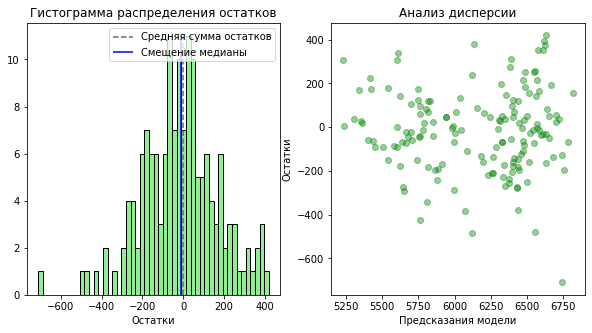

In [159]:
# гистограмма распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(residuals_3, bins=50, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_3.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# график дисперсии
axes[1].scatter(predictions, residuals_3, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

#### Вывод по третьей модели

- Остатки нормально распределены, график — относительно симметричен от самого частого значения. Отклонение от средней суммы остатков - наименьшее среди всех моделей;
- Дисперсия остатков - нормальная;
- **R2 третьей модели** = 0.8467677260231983 (метрика еще увеличилась по сравнению с прошлой моделью - наилучший результат).

### Сравнение качества трех моделей

In [160]:
# сравнение r2_score
r2_compared = {'первой': r2, 'второй': r2_2, 'третьей': r2_3}
for k, v in r2_compared.items():
    print(f'R2 {k} модели: {v}')

# сравнение остатков
residuals_compared = {'первой': residuals_1, 'второй': residuals_2, 'третьей': residuals_3}
for k, v in residuals_compared.items():
    print(f'Среднее значение остатков {k} модели: {v.mean()}')

R2 первой модели: 0.7951757980652822
R2 второй модели: 0.820097367718629
R2 третьей модели: 0.8262863382397995
Среднее значение остатков первой модели: -28.09067524921147
Среднее значение остатков второй модели: -25.601566488466933
Среднее значение остатков третьей модели: -16.55910984871613


На данном этапе **третья модель** показывает наилучшее значение r2 = 0.8262863382397995

У третьей модели минимальное среднее значение остатков: -16.55910984871613

In [161]:
# циклы, выводящие основные метрики
mse_compared = {'первой': mse, 'второй': mse_2, 'третьей': mse_3}
for k, v in mse_compared.items():
    print(f'MSE {k} модели: {v}')

rmse_compared = {'первой': rmse, 'второй': rmse_2, 'третьей': rmse_3}
for k, v in rmse_compared.items():
    print(f'RMSE {k} модели: {v}')

mae_compared = {'первой': mae, 'второй': mae_2, 'третьей': mae_3}
for k, v in mae_compared.items():
    print(f'MAE {k} модели: {v}')

MSE первой модели: 41695.0313959099
MSE второй модели: 36621.87295410215
MSE третьей модели: 35362.0153896586
RMSE первой модели: 204.19361252475528
RMSE второй модели: 191.36842204005904
RMSE третьей модели: 188.0479071663883
MAE первой модели: 160.87314968758835
MAE второй модели: 147.77939186178457
MAE третьей модели: 144.71452607169232


In [162]:
# 95% доверительный интервал лучшей модели 
interval_95 = st.norm.interval(confidence=0.95, loc=np.mean(predictions), scale=st.sem(predictions))
interval_95

(6093.573683581588, 6222.856638026671)

Лучшая модель - **третья.**

- **MSE** - 35362.0153896586
- **RMSE** - 188.0479071663883
- **MAE** - 144.71452607169232
- **95% доверительный интервал лучшей модели** = (6093.573683581588, 6222.856638026671)

### Финальная модель

#### Отбор признаков для модели линейной регресии

In [163]:
# копия датасета
cow_buy_model = df_cow_buy.copy(deep=True)

In [164]:
# среднее значение каждого недостающего признака и увеличиваем их на 5%
mean_values = df_main[['эке', 'сырой_протеин,г', 'спо']].mean()
new_values = mean_values * 1.05

In [165]:
# добавляем недостающие признаки и преобразовываем их
cow_buy_model['эке'] = new_values['эке']
cow_buy_model['эке_квадрат'] = cow_buy_model['эке'] ** 2
cow_buy_model['сырой_протеин,г'] = new_values['сырой_протеин,г']
cow_buy_model['спо'] = new_values['спо']
cow_buy_model['спо_категория'] = cow_buy_model['спо'].apply(lambda x: 1 if x > 0.91 else 0)

cow_buy_model = cow_buy_model.drop(['текущий_уровень_белка,%', 'эке', 'спо'], axis=1)

X_train_full = X_train_full.drop('вкус_молока', axis=1)

# проверка
display(cow_buy_model.shape)
display(X_train_full.shape)
display(cow_buy_model.head())
display(X_train_full.head())

(16, 9)

(628, 8)

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2  РефлешнСоверинг    Равнинное          Соверин     Барин   
3  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    Равнинное           Айдиал    Буйный   

   текущая_жирность,%      возраст  эке_квадрат  сырой_протеин,г  \
0                3.58  более_2_лет   233.361138      2019.947532   
1                3.54  менее_2_лет   233.361138      2019.947532   
2                3.59  более_2_лет   233.361138      2019.947532   
3                3.40  более_2_лет   233.361138      2019.947532   
4                3.64  более_2_лет   233.361138      2019.947532   

   спо_категория  
0              1  
1              1  
2              1  
3              1  
4              1

сырой_протеин,г           порода тип_пастбища порода_папы_быка  \
0             2123  РефлешнСоверинг    Холмистое          Соверин   
1             1889  РефлешнСоверинг    Холмистое          Соверин   
2             1671   Вис Бик Айдиал    Равнинное           Айдиал   
3             2063   Вис Бик Айдиал    Холмистое           Айдиал   
4             2077   Вис Бик Айдиал    Равнинное           Айдиал   

       возраст  имя_папы  спо_категория  эке_квадрат  
0  более_2_лет  Соловчик              1       272.25  
1  менее_2_лет     Барин              0       156.25  
2  более_2_лет    Буйный              0       216.09  
3  более_2_лет    Буйный              1       207.36  
4  более_2_лет  Геркулес              0       171.61

#### Кодировка категориальных признаков, масштабирование количественных признаков

In [166]:
# разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст', 'имя_папы', 'спо_категория']
num_col_names = ['эке_квадрат', 'спо_категория', 'сырой_протеин,г']

# кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow_buy_model[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow_buy_model[num_col_names])

# собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



#### Обучение модели линейной регресии

In [167]:
model_lr_final  = LinearRegression()
model_lr_final.fit(X_train_full, y_train_full)
final_predictions = model_lr_final.predict(X_test_full)

In [168]:
# прогнозируемый удой
df_cow_buy['ожидаемый_удой'] = final_predictions
df_cow_buy

порода тип_пастбища порода_папы_быка  имя_папы  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1    Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2   РефлешнСоверинг    Равнинное          Соверин     Барин   
3   РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4   РефлешнСоверинг    Равнинное           Айдиал    Буйный   
5   РефлешнСоверинг    Равнинное          Соверин  Геркулес   
6    Вис Бик Айдиал    Равнинное          Соверин    Буйный   
7   РефлешнСоверинг    Холмистое           Айдиал    Буйный   
8    Вис Бик Айдиал    Холмистое          Соверин  Соловчик   
9   РефлешнСоверинг    Равнинное          Соверин  Геркулес   
10   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
11   Вис Бик Айдиал    Холмистое          Соверин     Барин   
12  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
13   Вис Бик Айдиал    Холмистое          Соверин  Соловчик   
14  РефлешнСоверинг    Равнинное          Соверин  Геркулес   
15   Вис Бик Айдиал    Равнинное          Соверин    Буйный   

    текущая_жирность,%  текущий_уровень_белка,%      возраст  ожидаемый_удой  
0                 3.58                    3.076  более_2_лет          6584.5  
1                 3.54                    3.081  менее_2_лет          6312.5  
2                 3.59                    3.074  более_2_лет          6295.5  
3                 3.40                    3.061  более_2_лет          6594.5  
4                 3.64                    3.074  более_2_лет          6543.5  
5                 3.63                    3.053  менее_2_лет          6368.5  
6                 3.57                    3.079  более_2_лет          6531.5  
7                 3.40                    3.079  менее_2_лет          6376.5  
8                 3.73                    3.055  более_2_лет          6351.5  
9                 3.73                    3.073  более_2_лет          6586.5  
10                3.68                    3.046  более_2_лет          6584.5  
11                3.42                    3.075  менее_2_лет          6095.5  
12                3.40                    3.065  более_2_лет          6594.5  
13                3.73                    3.079  более_2_лет          6351.5  
14                3.77                    3.053  менее_2_лет          6368.5  
15                3.34                    3.069  более_2_лет          6531.5

#### Вывод по финальной модели

Выявили лучшую модель из трех на валидационной выборке. Ей оказалась третья модель.

MSE - 35362.0153896586<br>
RMSE - 188.0479071663883<br>
MAE - 144.71452607169232<br>
95% доверительный интервал лучшей модели = (6093.573683581588, 6222.856638026671)

Протестировали модель на данных о коровах, которых фермер хочет изучить перед покупкой. Получили предсказания по всем коровам продавца.
По условию задачи регрессии, можем на данном этапе рекомендовать фермеру для покупки всех коров. Каждая из них, вероятно, выдает не менее 6000 кг. удоя в год, однако еще стоит предсказать, молоко каких коров будет вкусным.

## Обучение модели логистической регрессии

### Модель логистической регрессии

#### Отбор признаков для модели логистической регресии

В качестве целевого признака возьмем **Вкус молока**. 

In [169]:
# копия датасета
df_cow_buy_model = df_main.copy()

In [170]:
# вкус молока переводим в категориальный бинарный признак
df_cow_buy_model['вкус_молока_категория'] = df_cow_buy_model['вкус_молока'].apply(lambda x: 1 if x=='вкусно' else 0)

In [171]:
# СПО переводим в категориальный бинарный признак с порогом 0,91
df_cow_buy_model['спо_категория'] = df_cow_buy_model['спо'].apply(lambda x: 1 if x>=0.91 else 0)

In [172]:
# ЭКЕ возводим в квадрат
df_cow_buy_model['эке_квадрат'] = df_cow_buy_model['эке'] ** 2

In [173]:
# удаление неважных столбцов с точки зрения построения модели
df_cow_buy_model = df_cow_buy_model.drop(['id', 'удой,кг', 'вкус_молока', 'эке', 'спо'], axis=1)
df_cow_buy_model.head()

сырой_протеин,г           порода тип_пастбища порода_папы_быка  жирность,%  \
0             1743   Вис Бик Айдиал    Равнинное           Айдиал        3.58   
1             2138   Вис Бик Айдиал    Равнинное          Соверин        3.54   
2             1854  РефлешнСоверинг    Холмистое          Соверин        3.59   
3             2012  РефлешнСоверинг    Холмистое           Айдиал        3.40   
4             1675   Вис Бик Айдиал    Равнинное          Соверин        3.73   

   белок,%      возраст  вкус_молока_категория  спо_категория  эке_квадрат  
0    3.076  более_2_лет                      1              0       201.64  
1    3.079  менее_2_лет                      1              0       163.84  
2    3.074  более_2_лет                      0              0       196.00  
3    3.075  более_2_лет                      0              0       153.76  
4    3.073  менее_2_лет                      1              0       163.84

#### Тренировочная и тестовая выборки

In [174]:
# сохранение признаков
X = df_cow_buy_model.drop('вкус_молока_категория', axis=1)
y = df_cow_buy_model['вкус_молока_категория'] 

In [175]:
# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

In [176]:
# объединим тренировочную и валидационную выборки, чтобы позже заново кодировать и масштабировать полную тренировочную выборку
X_train_full = pd.concat([X_train, X_test], ignore_index=True)
y_train_full = pd.concat([y_train, y_test], ignore_index=True)

#### Кодировка категориальных признаков, масштабирование количественных признаков

In [177]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_категория']
num_col_names = ['жирность,%', 'белок,%', 'эке_квадрат', 'сырой_протеин,г']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



#### Обучение модели логистической регресии

In [178]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

pd.DataFrame(zip(y_test, y_pred), columns = ['test','pred']).head() 

test  pred
0     1     1
1     1     1
2     1     1
3     0     0
4     1     1

#### Оценка качества модели

In [179]:
clf_accuracy = accuracy_score(y_test, y_pred)
clf_recall = recall_score(y_test, y_pred)
clf_precision = precision_score(y_test, y_pred)

print(f'Accuracy: {clf_accuracy}')
print(f'Recall: {clf_recall}')
print(f'Precision: {clf_precision}')

Accuracy: 0.6242038216560509
Recall: 0.8522727272727273
Precision: 0.6198347107438017


#### Матрица ошибок

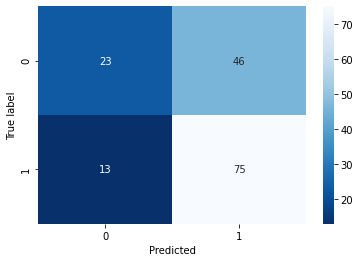

In [180]:
# построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

Precision = 0.6198347107438017

Recall = 0.8522727272727273

Accuracy = 0.6242038216560509

Имеем 46 ошибок первого рода, по отношению к 75 верноположительным предсказаниям. Больше половины ошибок: нужно минимизировать их количество.

### Анализ модели логистической регрессии

**Ошибка первого рода** - критичнее всего при покупке коров, поскольку в таком случае мы рекомендуем фермеру приобрести коров с фактически не вкусным молоком.

**Recall:** в метрике задействуются ответы TP и FN. Ошибки второго рода - не критичны для нас, поскольку нет страшного в том, что мы не предложим фермеру несколько коров, у которых вкусное молоко. Гораздо хуже будет, если предложить не вкусное.

**Precision:** в метрике задействуются ответы TP и FP. Количество FP (ошибок первого рода) нужно сводить к минимуму, ибо они критичны. В таком случае можно сказать, что нам нужно максимизировать метрику Precision.

#### Подбор порога класса

In [181]:
# вероятности класса predict_proba() и правильные ответы
y_proba = clf.predict_proba(X_test)[:, 1]

proba_data = pd.DataFrame(zip(y_test, y_proba),
                          columns=['y_test', 'y_proba']).sort_values(by='y_proba', ascending=False)

proba_data.head()

y_test   y_proba
85        1  0.839956
66        1  0.836504
110       1  0.830874
51        1  0.824231
146       1  0.821701

In [182]:
# функция расчета метрик для каждого порога
def threshold_choice(threshold_list, proba_df):
    result_df = pd.DataFrame(columns=['порог', 'precision', 'recall', 'количество_FP', 'число_предсказанных_объектов',
                                      'всего_объектов_класса_1'])

    for threshold in threshold_list:
        column_name = 'y_pred_' + str(threshold)

        precision = proba_df.loc[proba_df[column_name] == 1, 'y_test'].mean()

        # Число предсказанных объектов
        predicted_objects = proba_df[column_name].sum()

        # Всего объектов класса 1
        total_objects_class_1 = proba_df['y_test'].sum()

        recall = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_test'] == 1)].shape[
                     0] / total_objects_class_1

        # Количество ложноположительных предсказаний
        false_positives = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_test'] == 0)].shape[0]

        # Добавляем результаты в датафрейм
        result_df = result_df.append({
            'порог': threshold,
            'precision': precision,
            'recall': recall,
            'количество_FP': false_positives,
            'число_предсказанных_объектов': predicted_objects,
            'всего_объектов_класса_1': total_objects_class_1,
        }, ignore_index=True)

    return result_df

In [183]:
# общий перебор порогов
proba_data_1 = proba_data.copy(deep=True)

thresholds_1 = [round(i, 2) for i in np.linspace(0.1, 1, num=10, endpoint=False)]
columns = []

for i in thresholds_1:
    columns.append('y_pred_' + str(i))
    proba_data_1['y_pred_' + str(i)] = proba_data_1['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data_1.head(5)

y_test   y_proba  y_pred_0.1  y_pred_0.19  y_pred_0.28  y_pred_0.37  \
85        1  0.839956           1            1            1            1   
66        1  0.836504           1            1            1            1   
110       1  0.830874           1            1            1            1   
51        1  0.824231           1            1            1            1   
146       1  0.821701           1            1            1            1   

     y_pred_0.46  y_pred_0.55  y_pred_0.64  y_pred_0.73  y_pred_0.82  \
85             1            1            1            1            1   
66             1            1            1            1            1   
110            1            1            1            1            1   
51             1            1            1            1            1   
146            1            1            1            1            1   

     y_pred_0.91  
85             0  
66             0  
110            0  
51             0  
146            0

In [184]:
threshold_choice(thresholds_1, proba_data_1)

порог  precision    recall  количество_FP  число_предсказанных_объектов  \
0   0.10   0.560510  1.000000           69.0                         157.0   
1   0.19   0.560510  1.000000           69.0                         157.0   
2   0.28   0.564103  1.000000           68.0                         156.0   
3   0.37   0.565517  0.931818           63.0                         145.0   
4   0.46   0.603053  0.897727           52.0                         131.0   
5   0.55   0.648649  0.818182           39.0                         111.0   
6   0.64   0.746269  0.568182           17.0                          67.0   
7   0.73   0.852941  0.329545            5.0                          34.0   
8   0.82   1.000000  0.056818            0.0                           5.0   
9   0.91        NaN  0.000000            0.0                           0.0   

   всего_объектов_класса_1  
0                     88.0  
1                     88.0  
2                     88.0  
3                     88.0  
4                     88.0  
5                     88.0  
6                     88.0  
7                     88.0  
8                     88.0  
9                     88.0

Порог ниже 0.64 дает нам большое количество FP, однако значения выше порога 0.73 - слишком сильно влияют на метрику recall. Проанализируем интервал.

In [185]:
# детальный перебор порогов
proba_data_2 = proba_data.copy(deep=True)

thresholds_2 = [round(i, 2) for i in np.linspace(0.64, 0.75, num=11, endpoint=False)]

columns = []

for i in thresholds_2:
    columns.append('y_pred_' + str(i))
    proba_data_2['y_pred_' + str(i)] = proba_data_2['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data_2.head(5)

y_test   y_proba  y_pred_0.64  y_pred_0.65  y_pred_0.66  y_pred_0.67  \
85        1  0.839956            1            1            1            1   
66        1  0.836504            1            1            1            1   
110       1  0.830874            1            1            1            1   
51        1  0.824231            1            1            1            1   
146       1  0.821701            1            1            1            1   

     y_pred_0.68  y_pred_0.69  y_pred_0.7  y_pred_0.71  y_pred_0.72  \
85             1            1           1            1            1   
66             1            1           1            1            1   
110            1            1           1            1            1   
51             1            1           1            1            1   
146            1            1           1            1            1   

     y_pred_0.73  y_pred_0.74  
85             1            1  
66             1            1  
110            1            1  
51             1            1  
146            1            1

In [186]:
threshold_choice(thresholds_2, proba_data_2)

порог  precision    recall  количество_FP  число_предсказанных_объектов  \
0    0.64   0.746269  0.568182           17.0                          67.0   
1    0.65   0.737705  0.511364           16.0                          61.0   
2    0.66   0.741379  0.488636           15.0                          58.0   
3    0.67   0.763636  0.477273           13.0                          55.0   
4    0.68   0.795918  0.443182           10.0                          49.0   
5    0.69   0.826087  0.431818            8.0                          46.0   
6    0.70   0.860465  0.420455            6.0                          43.0   
7    0.71   0.871795  0.386364            5.0                          39.0   
8    0.72   0.868421  0.375000            5.0                          38.0   
9    0.73   0.852941  0.329545            5.0                          34.0   
10   0.74   0.814815  0.250000            5.0                          27.0   

    всего_объектов_класса_1  
0                      88.0  
1                      88.0  
2                      88.0  
3                      88.0  
4                      88.0  
5                      88.0  
6                      88.0  
7                      88.0  
8                      88.0  
9                      88.0  
10                     88.0

Порог 0.69 можно считать самым оптимальным, поскольку при нем мы минимизировали количество FP до 8, сохранив половину предсказанных ответов. Метрика recall при таком пороге не высока, но наша задача - стремиться к повышению precision при низком количестве FP, что и позволяет выбрать данный порог.

In [187]:
# оптимальный порог
OPTIMAL_THRESHOLD = 0.69

# применение порога к предсказанным вероятностям
y_pred_threshold = (y_proba > OPTIMAL_THRESHOLD).astype(int)

clf_accuracy_new = accuracy_score(y_test, y_pred_threshold)
clf_recall_new = recall_score(y_test, y_pred_threshold)
clf_precision_new = precision_score(y_test, y_pred_threshold)

print(f'New Accuracy: {clf_accuracy_new}')
print(f'New Recall: {clf_recall_new}')
print(f'New Precision: {clf_precision_new}')

New Accuracy: 0.6305732484076433
New Recall: 0.4318181818181818
New Precision: 0.8260869565217391


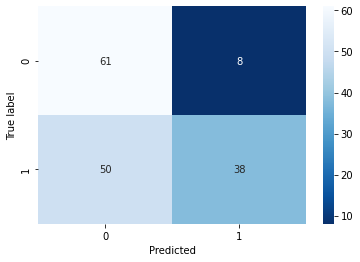

In [188]:
# построение матрицы ошибок
cm_new = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

Снизили количество ошибок первого рода с 46 до 8.

Accuracy = 0.6305732484076433<br>
Recall = 0.4318181818181818<br>
Precision = 0.8260869565217391<br>

### Прогноз вкуса молока коров

In [189]:
# копия датасета
df_cow_buy_model_2 = df_cow_buy.copy()

In [190]:
# добавляем недостающие признаки и преобразовываем их
df_cow_buy_model_2['эке'] = new_values['эке']
df_cow_buy_model_2['эке_квадрат'] = df_cow_buy_model_2['эке'] ** 2
df_cow_buy_model_2['сырой_протеин,г'] = new_values['сырой_протеин,г']
df_cow_buy_model_2['спо'] = new_values['спо']
df_cow_buy_model_2['спо_категория'] = df_cow_buy_model_2['спо'].apply(lambda x: 1 if x > 0.91 else 0)

df_cow_buy_model_2.rename(columns={'текущая_жирность,%': 'жирность,%', 'текущий_уровень_белка,%': 'белок,%'}, inplace=True)
df_cow_buy_model_2 = df_cow_buy_model_2.drop(['имя_папы', 'эке', 'спо'], axis=1)

df_cow_buy_model_2.head()

порода тип_пастбища порода_папы_быка  жирность,%  белок,%  \
0   Вис Бик Айдиал    Холмистое           Айдиал        3.58    3.076   
1   Вис Бик Айдиал    Равнинное          Соверин        3.54    3.081   
2  РефлешнСоверинг    Равнинное          Соверин        3.59    3.074   
3  РефлешнСоверинг    Холмистое           Айдиал        3.40    3.061   
4  РефлешнСоверинг    Равнинное           Айдиал        3.64    3.074   

       возраст  ожидаемый_удой  эке_квадрат  сырой_протеин,г  спо_категория  
0  более_2_лет          6584.5   233.361138      2019.947532              1  
1  менее_2_лет          6312.5   233.361138      2019.947532              1  
2  более_2_лет          6295.5   233.361138      2019.947532              1  
3  более_2_лет          6594.5   233.361138      2019.947532              1  
4  более_2_лет          6543.5   233.361138      2019.947532              1

In [191]:
X_train_full.head()

сырой_протеин,г           порода тип_пастбища порода_папы_быка  жирность,%  \
0             2123  РефлешнСоверинг    Холмистое          Соверин        3.70   
1             1889  РефлешнСоверинг    Холмистое          Соверин        3.34   
2             1671   Вис Бик Айдиал    Равнинное           Айдиал        3.18   
3             2063   Вис Бик Айдиал    Холмистое           Айдиал        3.62   
4             2077   Вис Бик Айдиал    Равнинное           Айдиал        3.64   

   белок,%      возраст  спо_категория  эке_квадрат  
0    3.074  более_2_лет              1       272.25  
1    3.072  менее_2_лет              0       156.25  
2    3.079  более_2_лет              0       216.09  
3    3.079  более_2_лет              1       207.36  
4    3.076  более_2_лет              0       171.61

In [192]:
# разделяем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_категория']
num_col_names = ['жирность,%', 'белок,%', 'эке_квадрат', 'сырой_протеин,г']

# кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(df_cow_buy_model_2[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(df_cow_buy_model_2[num_col_names])

# собираем выборки
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [193]:
# обучение модели
clf = LogisticRegression()
clf.fit(X_train_full, y_train_full)
y_proba = clf.predict_proba(X_test_full)[:, 1]
predictions_final = (y_proba > OPTIMAL_THRESHOLD).astype(int)

In [194]:
# прогнозируемый вкус молока
df_cow_buy['прогнозируемый_вкус_молока'] = predictions_final
df_cow_buy['прогнозируемый_вкус_молока'] = df_cow_buy['прогнозируемый_вкус_молока'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
df_to_buy = df_cow_buy.query('прогнозируемый_вкус_молока == "вкусно"')
df_cow_buy

порода тип_пастбища порода_папы_быка  имя_папы  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
1    Вис Бик Айдиал    Равнинное          Соверин    Буйный   
2   РефлешнСоверинг    Равнинное          Соверин     Барин   
3   РефлешнСоверинг    Холмистое           Айдиал    Буйный   
4   РефлешнСоверинг    Равнинное           Айдиал    Буйный   
5   РефлешнСоверинг    Равнинное          Соверин  Геркулес   
6    Вис Бик Айдиал    Равнинное          Соверин    Буйный   
7   РефлешнСоверинг    Холмистое           Айдиал    Буйный   
8    Вис Бик Айдиал    Холмистое          Соверин  Соловчик   
9   РефлешнСоверинг    Равнинное          Соверин  Геркулес   
10   Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
11   Вис Бик Айдиал    Холмистое          Соверин     Барин   
12  РефлешнСоверинг    Холмистое           Айдиал    Буйный   
13   Вис Бик Айдиал    Холмистое          Соверин  Соловчик   
14  РефлешнСоверинг    Равнинное          Соверин  Геркулес   
15   Вис Бик Айдиал    Равнинное          Соверин    Буйный   

    текущая_жирность,%  текущий_уровень_белка,%      возраст  ожидаемый_удой  \
0                 3.58                    3.076  более_2_лет          6584.5   
1                 3.54                    3.081  менее_2_лет          6312.5   
2                 3.59                    3.074  более_2_лет          6295.5   
3                 3.40                    3.061  более_2_лет          6594.5   
4                 3.64                    3.074  более_2_лет          6543.5   
5                 3.63                    3.053  менее_2_лет          6368.5   
6                 3.57                    3.079  более_2_лет          6531.5   
7                 3.40                    3.079  менее_2_лет          6376.5   
8                 3.73                    3.055  более_2_лет          6351.5   
9                 3.73                    3.073  более_2_лет          6586.5   
10                3.68                    3.046  более_2_лет          6584.5   
11                3.42                    3.075  менее_2_лет          6095.5   
12                3.40                    3.065  более_2_лет          6594.5   
13                3.73                    3.079  более_2_лет          6351.5   
14                3.77                    3.053  менее_2_лет          6368.5   
15                3.34                    3.069  более_2_лет          6531.5   

   прогнозируемый_вкус_молока  
0                      вкусно  
1                   не вкусно  
2                   не вкусно  
3                   не вкусно  
4                   не вкусно  
5                   не вкусно  
6                   не вкусно  
7                      вкусно  
8                   не вкусно  
9                   не вкусно  
10                  не вкусно  
11                  не вкусно  
12                  не вкусно  
13                     вкусно  
14                  не вкусно  
15                  не вкусно

## Итоговые выводы

### Коровы, которые рекомендованы к покупке на основе прогноза

In [195]:
df_to_buy

порода тип_пастбища порода_папы_быка  имя_папы  \
0    Вис Бик Айдиал    Холмистое           Айдиал  Геркулес   
7   РефлешнСоверинг    Холмистое           Айдиал    Буйный   
13   Вис Бик Айдиал    Холмистое          Соверин  Соловчик   

    текущая_жирность,%  текущий_уровень_белка,%      возраст  ожидаемый_удой  \
0                 3.58                    3.076  более_2_лет          6584.5   
7                 3.40                    3.079  менее_2_лет          6376.5   
13                3.73                    3.079  более_2_лет          6351.5   

   прогнозируемый_вкус_молока  
0                      вкусно  
7                      вкусно  
13                     вкусно

Модель спрогнозировала на данных о коровах, которых фермер хочет изучить перед покупкой и получила предсказания по всем коровам продавца - "ЭкоФерма".
Можем на данном этапе рекомендовать фермеру для покупки **трех коров.** Каждая из них, вероятно, выдает **не менее 6000 кг. удоя в год вкусного молока.**

### Выполненные действия

В ходе работы над проектом была разработана модель машинного обучения, которая сможет помочь заказчику управлять рисками и принимать объективное решение о покупке коров. 

1. Подготовлено описание проекта, цель проекта, описание данных.
2. Импортированы все необходимые библиотеки для работы.
3. Получены датафреймы "df_main", "df_dad", "df_cow_buy".
4. Подготовлены все функции, которые потребуется во время работы с датафреймами.
5. Определили, что стоит изменить названия столбцов и привести их к единому виду.
6. Проведена предобработка данных: приведены в нижний регистр название столбцов, удалены строки с пропуском года релиза, преобразован тип данных в столбце "year_of_release" в "datetime", заменили в столбце "user_score" значение "TBD" на "0", заменили в столбце "user_score" формат данных на "float", удалены две строки с пропускаи в столбцах "name" и "genre", в столбце "critic_score" пропуски заполнены "0", в столбце "rating" пропуски заполнены значением "RP".
Проведена проверка данных в датафрейме на явные дубликаты. Дубликаты не обнаружены.
7. Выявили, что почти все признаки распределены нормально и не требуют особых корректировок выбросов.
8. Убрали аномальное значение признака удой = 45616

### Корреляция

Корреляция между Удоем и другими признаками:<br>
- ЭКЕ: положительная высокая взаимосвязь. С увеличением ЭКЕ увеличивается и удой. По графикам распределения, корреляция справедлива как для одной, так и для другой породы. Коэффициент взаимосвязи: 0.72;
- Сырой_протеин: на диаграмме рассеяния наблюдается общий тренд на прямую пропорциональную зависимость. Связь умеренно положительная. Коэффициент взаимосвязи: 0.46;
- СПО: Похоже, что Удой заметно зависит от СПО - высокий коэффициент корреляции. Связь похожа на нелинейную. На диаграмме рассеяния наблюдается группировка в два кластера между границей СПО = 0.91 Коэффициент взаимосвязи: 0.66;
- Порода: Удой слабо зависит от породы. Коэффициент взаимосвязи: 0.16;
- Тип пастбища: Удой слабо зависит от типа пастбища. Коэффициент взаимосвязи: 0.28;
- Порода папы быка: Удой заметно зависит от породы папы быка - высокий коэффициент корреляции. Коэффициент взаимосвязи: 0.52;
- Жирность: Заметная положительная зависимость. Более всего связь раскрывается на переходе значений жирность == 3.6 и 3.7. Коэффициент взаимосвязи: 0.71;
- Белок: Связь слабая. Связь между этим признаком и целевым - нелинейная. Но стоит отметить, что наблюдается зависимость между признаком белок и породой. Меньшее значения белка характерно для породы РефлешнСоверинг, большее значение - для породы Вис Бик Айдиал. Коэффициент взаимосвязи: 0.06;
- Вкус молока: Вкус молока слабо зависит от удоя. Коэффициент взаимосвязи: 0.17;
- Возраст: Возраст имеет сильнейшую взаимосвязь с Удоем. Коэффициент взаимосвязи: 1.00

**Между целевым и входными признаками связь в основном нелинейная, но наличие линейных связей также прослеживается:**
- **ЭКЕ** - линейная зависимость неярковыраженная;
- **Сырой_протеин** - линейная зависимость еще менее выраженей, чем у "Эке";
- **СПО** - линейная зависимость отсутствует;
- **Жирность** - линейной зависимости нет;
- **Белок** - зависимости не наблюдается, учитывая коэффициент корреляции.

### Предсказание удоя (Задача регресии)

Было обучено 3 модели линейной регрессии и проанализированы их остатки.

По итогам тестирования моделей была выбрана лучшая модель из трех на валидационной выборке, так как она показала самые лучшие метрики, показатели которой:

MSE - 35362.0153896586<br>
RMSE - 188.0479071663883<br>
MAE - 144.71452607169232<br>
95% доверительный интервал лучшей модели = (6093.573683581588, 6222.856638026671)

- Протестирована модель на тестовой выборке;
- Получено предсказание по всем коровам продавца: "ЭкоФерма";
- Добавлен столбец с предсказаниями в таблицу продавца: "Ожидаемый удой";
- Итогом предсказания стало то, что все коровы продавцы - "ЭкоФерма" соответствуют первому требованию фермера: у всех коров прогнозируемый удой >6000 кг / год.

### Предсказание вкуса молока (Задача классификации)

Подобраны параметры и обучена модель логистической регрессии.
Проанализирована модель и минимизировано количество критических ошибок первого рода с 46 до 8, подобрав новый порог для вероятности предсказаний = 0,69.
Определены 3 коровы, чье молоко по предсказанию модели будет являться как "вкусное".
Отобраны для рекомендации **3 коровы**, учитывая оба условия заказчика: 
- Средний удой за год - не менее 6000 килограммов;
- Молоко должно быть вкусным.

### Рекомендации фермеру

Фермеру перед покупкой предложенных трех коров следует учитывать следующие факторы:
- перед тем как модель предсказывала удои коров "ЭкоФермы", такие параметры как ЭКЕ, СПО и сырой протеин были увеличены на 5% В будущем фермер может улучшать данные показати корма для увеличения удоев.
- с увеличением возраста коровы, удои будут возрастать;
- для увеличения качества прогнозов, рекомендуется фермеру указывать возраст коровы в годах, а не делить на две группы (до 2-х лет и более 2-х лет);
- контроллировать данные в таблице и не допускать невернных данных или дублирования информации;
- для улучшения параметров модели по предсказанию вкуса молока, требуется больши данных, как для обучения модели (то есть данные с коров стада фермера), так и данные от "ЭкоФермы" (данные о коровах стада продавца).



### Выводы по моделям

#### Линейная регрессия

Было обучено 3 модели линейной регрессии и проанализированы их остатки.
Для улучшения моделей были выполнены следующие действия:
- проведено кодирование всех категориальных признаков;
- проведено масштабирование всех количественных признаков;
- исключены нелинейные признаки из датафреймв;
- СПО (количественный признак с нелинейной зависимостью) преобразован в категориальный признак по границе (устранили нелинейность);
- ЭКЕ (количественный признак с нелинейной зависимостью) преобразован в ЭКЕ в квадрате для устранения нелинейности;
- в датафрейм добавлены имена папы быка для улучшения работы модели.

По итогам тестирования моделей была выбрана лучшая модель из трех на валидационной выборке, так как она показала самые лучшие метрики, показатели которой:

MSE - 35362.0153896586<br>
RMSE - 188.0479071663883<br>
MAE - 144.71452607169232<br>
95% доверительный интервал лучшей модели = (6093.573683581588, 6222.856638026671)

Модель возможно улучшить, если получить данные по возрасту коровы в годах, а не поделенные на две группы (менее 2-х лет и более 2-х лет), а также получить картину по корму, который предоставляется коровам, а не одним параметром ЭКЕ. Так как есть подозрения, что на удой влияет что-то конкретное в корме.

Важным параметром в линейной регрессии для фермера будет средняя абсолютная ошибка **MAE.** Эта метрика измеряется в тех же единицах, что и целевой показатель. Чем меньше средняя абсолютная ошибка, тем лучше модель предсказывает целевой признак.

#### Логистическая регрессия

Была обучена модель логистической регрессии и проанализированы ее метрики.
Для улучшения моделей были выполнены следующие действия:
- признак "Вкус молока" переведен из категориального в бинарный категориальный;
- проведено кодирование всех категориальных признаков;
- проведено масштабирование всех количественных признаков;
- исключены нелинейные признаки из датафреймв;
- СПО (количественный признак с нелинейной зависимостью) преобразован в категориальный признак по границе (устранили нелинейность);
- ЭКЕ (количественный признак с нелинейной зависимостью) преобразован в ЭКЕ в квадрате для устранения нелинейности;
- в датафрейм добавлены имена папы быка для улучшения работы модели;
- проанализированы метрики первой модели;
- выбран оптимальный порог принадлежности к классам для лучшего Precision.

Модель не возможно улучшить, на текущем этапе. Так как при подборе оптимального порога, если ориентироваться только на метрику Precision, увеличивая ее значение можно столкнуться с уменьшением метрики Recall, что тоже плохо сказывается на модель.<br>
Для улучшения модели в будущем требуется улучшить данные в информации от фермера: необходимо получить подробную информации от фермера о качестве кормов (рацион), состояние здоровья коровы, данные о вкусе молока мамы коровы (имеется прямая зависимость вкуса молока от наследственности). 

Важным параметром в логистической регрессии для фермера будет: Precision, так как данная метрика позволяет исключить ошибки в предсказании "не вкусного" молока, что является **ВАЖНЫМ для фермера!**